MANUKYAN Eva, SEBASTIAN Elisa, REBOUILLAT Caroline 

# IBM HR Analytics Employee Attrition & Performance

> **Goal** : Predict **attrition** of valuable employees in order to avoid loss of talent and understand the factors that influence the employee's decision. 
> <br><br> **Summary** :
- **1) Data Preparation**
- **2) Intro/ Descriptive Statistics**
- **3) Econometric models**
    - **A) An initial variables selection**
        - A.1) PCA on continue variables
        - A.2) Best Subset Selection
        - A.3) Forward Stepwise Selection
    - **B) Estimation of econometric models and additional variables selection**
        - B.1) Taking into account non-linearities
        - B.2) Basic Logistic Regression
        - B.3) Ridge with Logistic Regression
        - B.4) Lasso with Logistic Regression
        - B.5) Elastic Net with Logistic Regression
- **4) Machine learning models**
    - 4.1) Logistic regression from scratch - gradient descent
    - 4.2) Tree-based methods<br>
        -4.2.1) Simple classification tree<br>
        -4.2.2) Bagging<br>
        -4.2.3) Random forest<br>
    - 4.3) Neural network
    - 4.4) K-means
    - 4.5) SVM
        

# <br><br>1) Data Preparation 

## The different database that we can use/ summary of the data preparation : 
- **df** : database with quantitative and qualitative variables without dummies (for descriptive statistics). 
- **df1**: database with quantitative and qualitative variables **ENCODED** AS dummies
- **df2**: **STANDARDIZE** database with quantitative and qualitative variables encoded as dummies (for that we use df1_quanti which is only quantitative variables of df1, and df1_quanti_scaled which is quantitative variables of df1 rescaled)
- **X_train, X_test**, Y_test, Y_train : split for the df1 database (not rescaled) and SMOTE
- **X_train_scaled, X_test_scaled**, Y_train, Y_test : split for the df2 database (rescaled) and SMOTE
- **x_train, x_test**, Y_test, Y_train : split for the df1 database (not rescaled) with droping a value for dummy variables and SMOTE
- **x_train_scaled, x_test_scaled**, Y_train, Y_test : split for the df2 database (rescaled) with droping a value for dummy variables and SMOTE. 

In [1]:
import numpy as np
import pandas as pd

In [4]:
#df = pd.read_csv("IBM.csv")
#df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv("/Users/evamanukyan/Documents/faculté/MAG3-EBDS/projet 3 /IBM_Attrition.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

> Our input is Attrition (1 if yes, 0 if no), other variables are explanatory. 

## Qualitative features

Some description to understand qualitative variables:

In [7]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,":")
        print(df[i].unique(), "\n")

Attrition :
['Yes' 'No'] 

BusinessTravel :
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department :
['Sales' 'Research & Development' 'Human Resources'] 

EducationField :
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender :
['Female' 'Male'] 

JobRole :
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus :
['Single' 'Married' 'Divorced'] 

Over18 :
['Y'] 

OverTime :
['Yes' 'No'] 



In [53]:
moyenne = df.groupby('Attrition')['TrainingTimesLastYear'].mean()
print(moyenne)

Attrition
No     2.832928
Yes    2.624473
Name: TrainingTimesLastYear, dtype: float64


In [51]:
res1 =moyenne.to_frame()
res1.head(20)

,YearsInCurrentRole
Attrition,
No,4.484185
Yes,2.902954


In [29]:
resultat = df.groupby('Attrition')['Gender'].value_counts()
print(resultat)

Attrition  Gender
No         Male      732
           Female    501
Yes        Male      150
           Female     87
Name: Gender, dtype: int64


In [30]:
res =resultat.to_frame()
res.head(20)

Gender
Attrition Gender        
No        Male       732
          Female     501
Yes       Male       150
          Female      87

In [31]:
print("Male", 150/732)
print("female", 87/501)



Male 0.20491803278688525
female 0.17365269461077845


> Note: Some quantitative variables are qualitative variables so we also have to recode it. <br><br> **Job level** (we will delete it later because we don't really know its meaning) <br><br> **StockOptionLevel** : 0, 1, 2, 3 (We don't know exactly what does it means, in any case we will see that it's highly correlated with marital status..) <br><br>**Education**
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor' <br><br>**EnvironmentSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'<br><br>**JobInvolvement**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'<br><br>**JobSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'<br><br>**PerformanceRating**
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'-> Problem with this variable: there are only 3 and 4 so we will delete it <br><br>**RelationshipSatisfaction**
1 'Low'
2 'Medium'
3 'High'
4 'Very High'<br><br>**WorkLifeBalance**
1 'Bad'
2 'Good'
3 'Better'
4 'Best' <br><br>
We suspect that some qualitative variables such as **Department**, **EducationField** and **JobRole** are really correlated. Therefore keep all those 3 is not necessarily (but we will see correlations to be sure). 

### Correlation (that work with categorical values)

In [11]:
import scipy.stats as ss
from dython import nominal # pip install dython in the terminal

#### Cramer's V

> It is based on a nominal variation of **Pearson’s Chi-Square Test**. <br> 0 means no association and 1 is full association. <br> Cramer’s V is symmetrical = it is **insensitive to swapping variable x1 and variable x2**. 

C:\Users\Station\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


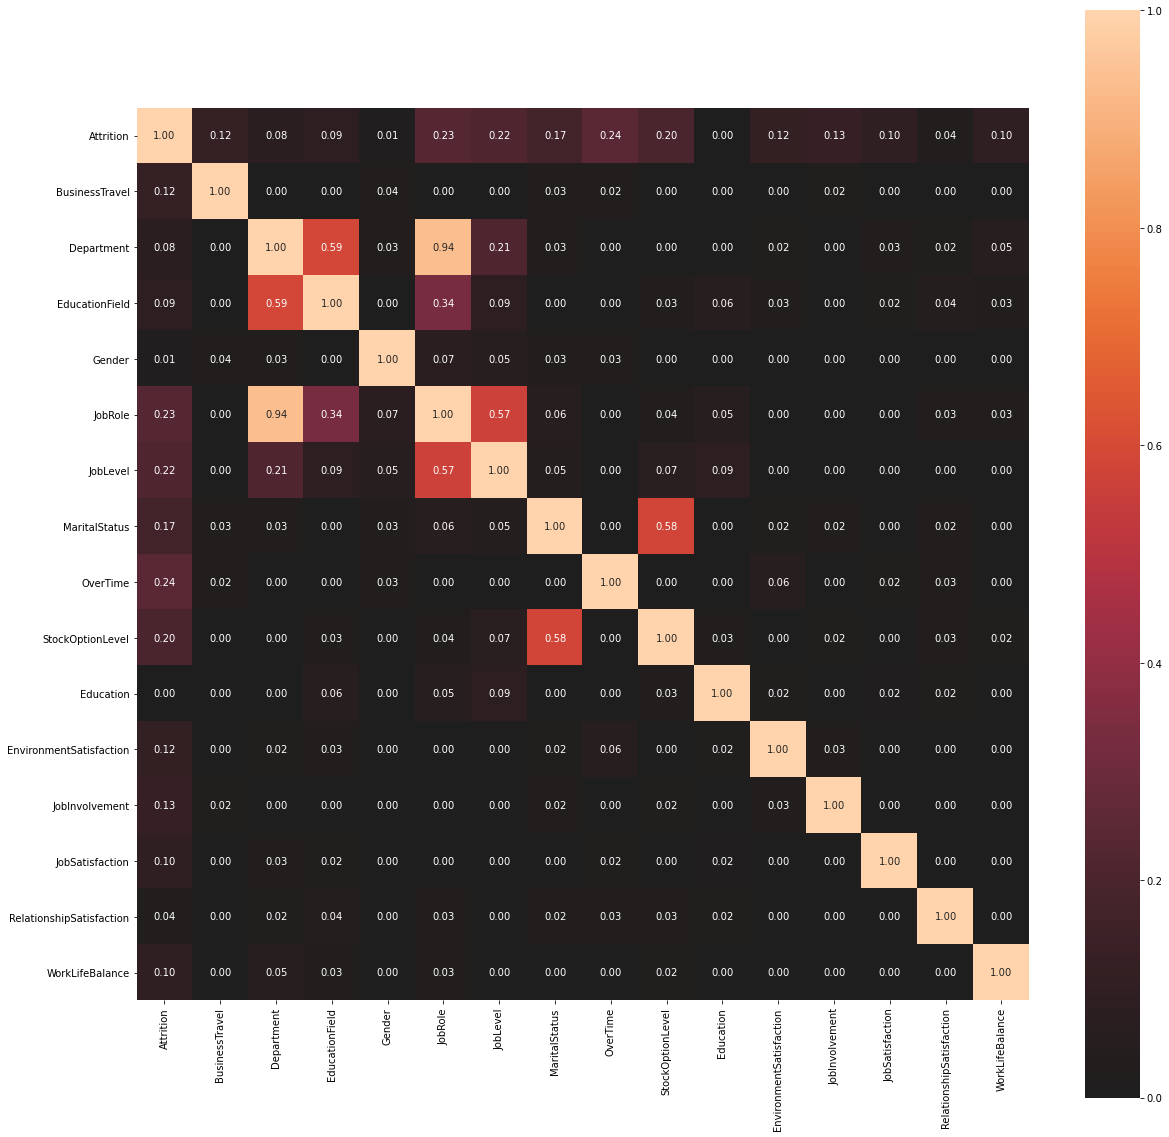

{'corr':                           Attrition  BusinessTravel  Department  \
 Attrition                  1.000000        0.122880    0.077375   
 BusinessTravel             0.122880        1.000000    0.000000   
 Department                 0.077375        0.000000    1.000000   
 EducationField             0.086617        0.000000    0.587962   
 Gender                     0.008897        0.037174    0.025605   
 JobRole                    0.230701        0.000000    0.937128   
 JobLevel                   0.215982        0.000000    0.212347   
 MaritalStatus              0.173386        0.034524    0.030019   
 OverTime                   0.242749        0.024089    0.000000   
 StockOptionLevel           0.198010        0.000000    0.000000   
 Education                  0.000000        0.000000    0.000000   
 EnvironmentSatisfaction    0.115220        0.000000    0.017813   
 JobInvolvement             0.131727        0.016229    0.000000   
 JobSatisfaction            0.099362    

In [12]:
nominal.associations(df[["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "JobLevel", "MaritalStatus", "OverTime","StockOptionLevel", "Education","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance"]], nominal_columns='all', plot=True, figsize=(20,20))

> We see that Department and JobRole is highly correlated in the sense of Cramer's V <br> (Also between Department and EducationField, MaritalStatus and StockOptionLevel, JobRole and JobLevel). <br> Let's overcome the problem of symmetry with Theil's U.

#### Theil's U. 

> It is an **asymmetric measure of association between categorical features**. <br> Given the value of x1, how many possible states does x2 have, and how often do they occur. <br> Just like Cramer’s V, the output value is on the range of [0,1], with the same interpretations as before — but unlike Cramer’s V, it is asymmetric, meaning that knowing x1 means we know x2, but not vice-versa.

C:\Users\Station\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


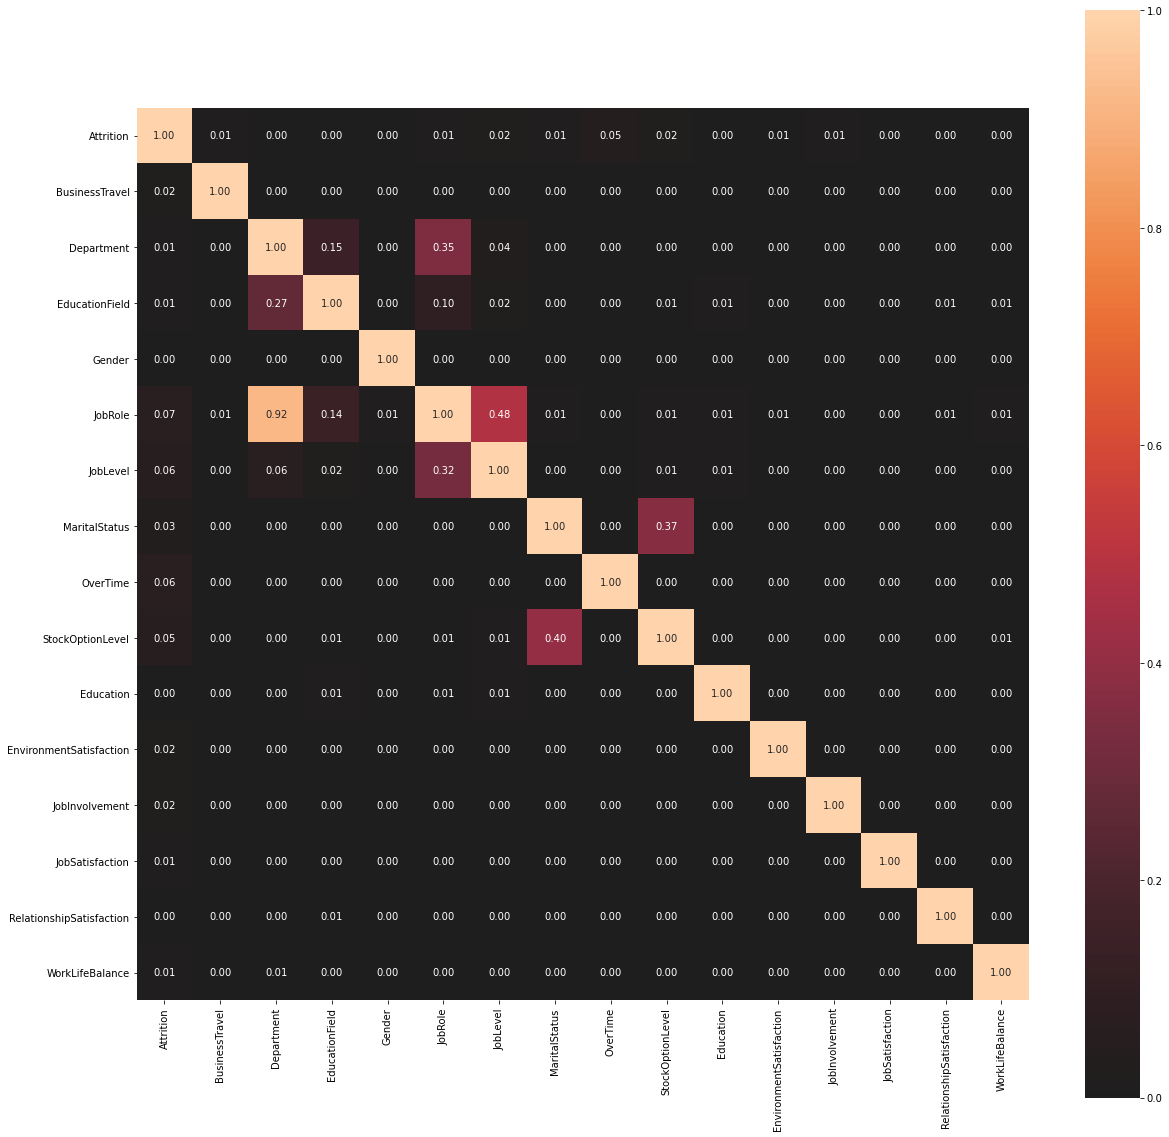

{'corr':                           Attrition  BusinessTravel  Department  \
 Attrition                  1.000000        0.010219    0.004606   
 BusinessTravel             0.018297        1.000000    0.000089   
 Department                 0.008078        0.000087    1.000000   
 EducationField             0.011474        0.002254    0.268031   
 Gender                     0.000990        0.001769    0.001322   
 JobRole                    0.068466        0.005209    0.915387   
 JobLevel                   0.056555        0.003456    0.064322   
 MaritalStatus              0.033883        0.003122    0.003071   
 OverTime                   0.062685        0.001250    0.000041   
 StockOptionLevel           0.047508        0.000858    0.002116   
 Education                  0.002464        0.002794    0.001316   
 EnvironmentSatisfaction    0.015844        0.001897    0.002996   
 JobInvolvement             0.019769        0.002527    0.001789   
 JobSatisfaction            0.013366    

In [13]:
nominal.associations(df[["Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "JobLevel", "MaritalStatus", "OverTime","StockOptionLevel", "Education","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","RelationshipSatisfaction", "WorkLifeBalance"]], nominal_columns='all',theil_u=True, plot=True, figsize=(20,20))

> We can see that knowing JobRole is knowing Department (0.92) but the inverse is not so high -> We propose therefore to **keep JobRole** and to **delete Department** in order to be more precise. <br> In a second step, the relationship between **JobRole and EducationField** is not so high : either we need another criteria, either we must keep the 2 (BUT the problem is on Human Resources that we have on both of those 2 variables). <br> We will see later if we can solve the problem with **automatic model selection.** <br><br> As said before, we don't know the signification of JobLevel which seems to be a little correlated to JobRole, we will certainly delete this variable. 

In [14]:
pd.crosstab(df["EducationField"], df["JobRole"], margins =True)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,All
EducationField,,,,,,,,,,
Human Resources,0,21,0,6,0,0,0,0,0,27
Life Sciences,60,13,119,40,71,36,133,107,27,606
Marketing,0,0,0,14,0,0,0,122,23,159
Medical,48,11,99,32,53,35,103,65,18,464
Other,9,3,22,5,7,4,17,13,2,82
Technical Degree,14,4,19,5,14,5,39,19,13,132
All,131,52,259,102,145,80,292,326,83,1470


In [15]:
pd.crosstab(df["StockOptionLevel"], df["MaritalStatus"], margins =True)

MaritalStatus,Divorced,Married,Single,All
StockOptionLevel,,,,
0,8,153,470,631
1,195,401,0,596
2,75,83,0,158
3,49,36,0,85
All,327,673,470,1470


> All employees that are single have no StockOptionLevel (=0) and we don't know the signification of this variable.

### Keep qualitative variables that we need and recode it. 

> Every employees in the database are over 18 years old. Therefore we delete the variable Over18. <br> As said before we delete the variable Department, JobLebel, StockOptionLevel and PerformanceRating. 

In [16]:
df.drop('Over18', inplace=True, axis=1)
df.drop('Department', inplace=True, axis=1)
df.drop('StockOptionLevel', inplace=True, axis=1)
df.drop('JobLevel', inplace=True, axis=1)
df.drop('PerformanceRating', inplace=True, axis=1)

> Recoding binary variables.

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()
df["Attrition"] = labelencoder.fit_transform(df["Attrition"]) #1 if attrition, 0 otherwise
df["Gender"] = labelencoder.fit_transform(df["Gender"]) #0 for women, 1 for men
df["OverTime"] = labelencoder.fit_transform(df["OverTime"]) #1 if yes, 0 if no

> Recoding multiclass variables. 

In [18]:
df1=pd.get_dummies(data=df, columns=['BusinessTravel', 'JobRole', 'MaritalStatus', 'EducationField',"Education","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","RelationshipSatisfaction", "WorkLifeBalance"])

In [19]:
df1.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'Gender', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'Educati

> We will rename those dummies for a better usability. 

In [20]:
df1.rename(columns={'Gender':'Men', 
                    'BusinessTravel_Non-Travel': 'Non_Travel' ,
                   'BusinessTravel_Travel_Frequently':'Travel_Frequently',
                   'BusinessTravel_Travel_Rarely':'Travel_Rarely',
                   'JobRole_Healthcare Representative': 'Healthcare_Representative',
                    'JobRole_Human Resources':'Human_Resources_Job',
                   'JobRole_Laboratory Technician':'Laboratory_Technician' ,
                    'JobRole_Manufacturing Director':'Manufacturing_Director',
                    'JobRole_Research Director':'Research_Director',
                    'JobRole_Research Scientist':'Research_Scientist',
                   'JobRole_Sales Executive': 'Sales_Executive',
                   'JobRole_Sales Representative': 'Sales_Representative',
                   'MaritalStatus_Divorced':'Divorced',
                   'MaritalStatus_Married':'Married',
                   'MaritalStatus_Single':'Single',
                    'EducationField_Human Resources':'Human_Resources_Field',
                    'EducationField_Life Sciences':'Life_Sciences',
                    'EducationField_Marketing':'Marketing',
                    'EducationField_Medical':'Medical',
                    'EducationField_Other':'Other_Field',
                    'EducationField_Technical Degree':'Technical_Degree',
                    'Education_1':'Below_College',
                    'Education_2':'College',
                    'Education_3':'Bachelor',
                    'Education_4':'Master',
                    'Education_5':'Doctorant'},inplace=True)

## Quantitative variables 

> Here are the quantitative variables. <br> We don't keep EmployeeCount and EmployeeNumber which have no meaning (only index that are not useful) and StandardHours which is 80 for everyone. 

In [21]:
df1.drop('EmployeeCount', inplace=True, axis=1)
df1.drop('EmployeeNumber', inplace=True, axis=1)
df1.drop('StandardHours', inplace=True, axis=1) 

> We create a dataframe only for quantitative variables (it will be helpful when we will normalize the dataset)

In [22]:
df1_quanti = [df1['Age'],
 df1['DailyRate'],
 df1['DistanceFromHome'],
 df1['HourlyRate'],
 df1['MonthlyIncome'],
 df1['MonthlyRate'],
 df1['NumCompaniesWorked'],
 df1['PercentSalaryHike'],
 df1['TotalWorkingYears'],
 df1['TrainingTimesLastYear'],
 df1['YearsAtCompany'],
 df1['YearsInCurrentRole'],
 df1['YearsSinceLastPromotion'],
 df1['YearsWithCurrManager']]

In [23]:
headers= ['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
df1_quanti = pd.concat(df1_quanti, axis=1, keys=headers)

In [24]:
df1_quanti.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2


> As for qualitative variables, let's see correlations. 

<AxesSubplot:>

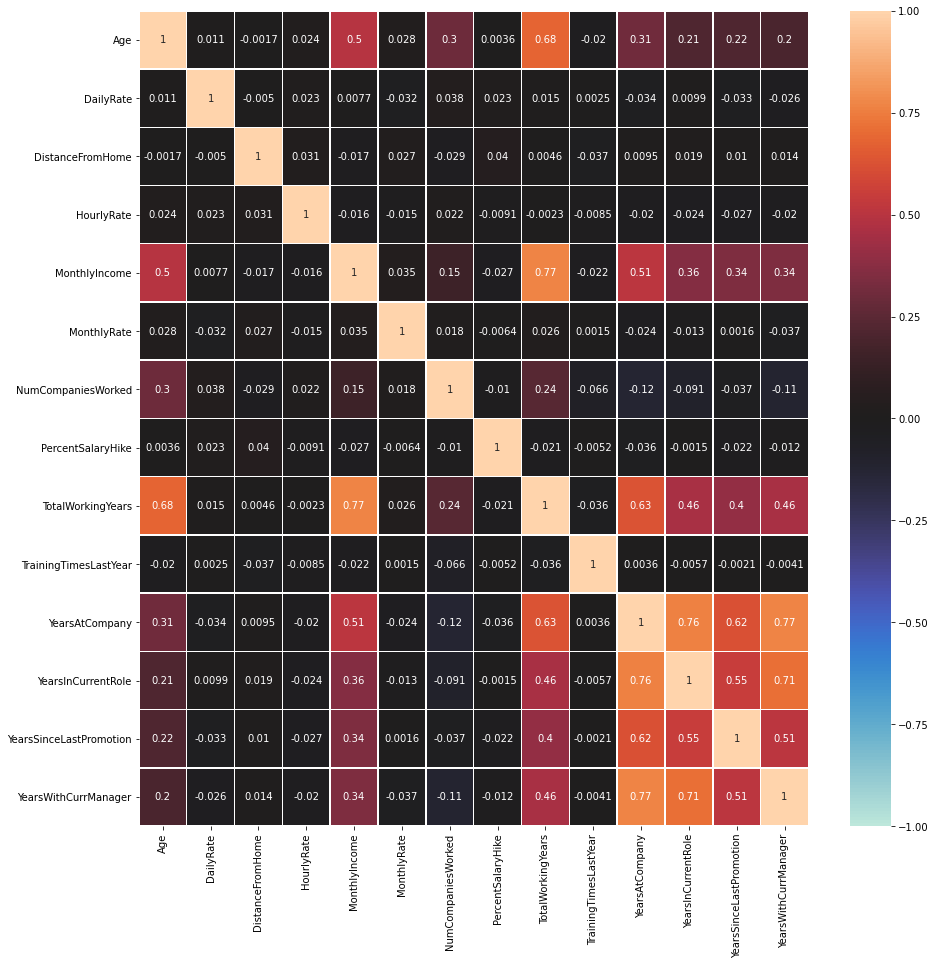

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df1_quanti.corr(), annot=True, linewidths=.5, ax=ax, vmin=-1, vmax=1, center= 0)

> Let's see which are the correlations >0.5 in absolute value: <br>
 - We can mostly see a square of highly correlated variables: YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrentManager which seems an evidence. (For example, if you spent many years with the same manager it seems to be logical that you spend many years in the company and vice versa). 
 - TotalWorkingYears is strongly correlated with many variables : Age, MonthlyIncome, YearsAtCompany.
 
 > Let's do a VIF test to see colinearity. 
 

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1_quanti.values,i) for i in range(df1_quanti.shape[1])]
vif["features"]=df1_quanti.columns

vif.round(1)

,VIF Factor,features
0,25.5,Age
1,4.7,DailyRate
2,2.3,DistanceFromHome
3,9.8,HourlyRate
4,7.3,MonthlyIncome
5,4.7,MonthlyRate
6,2.7,NumCompaniesWorked
7,13.6,PercentSalaryHike
8,13.3,TotalWorkingYears
9,5.3,TrainingTimesLastYear


> **Numerical value for VIF:** what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. <br> For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors. <br><br>
**A rule of thumb for the variance inflation factor:**<br>
- 1 = not correlated.<br>
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.<br><br>Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be (but in general, a VIF above 10 indicates high correlation and is cause for concern).<br><br> We can see that **Age**, **PercentSalaryHike**, **TotalWorkingYears** and **YearsAtCompany** are variables in this case. 

## Standardize variables

> Before we implement a regression model, we typically **standardize the variables first**. <br> It is necessary for example for ridge regression, since it would change the parameter we estimate. 

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

###Scale the data to have mean 0 stdev 1
df_quanti_scaled = preprocessing.scale(df1_quanti)
df_quanti_scaled=pd.DataFrame(df_quanti_scaled)
df_quanti_scaled.columns = [headers]

In [28]:
df_quanti_scaled.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


Let's look at the VIF. 

In [29]:
vif_scaled=pd.DataFrame()
vif_scaled["VIF Factor"] = [variance_inflation_factor(df_quanti_scaled.values,i) for i in range(df_quanti_scaled.shape[1])]
vif_scaled["features"]=df_quanti_scaled.columns

vif_scaled.round(1)

,VIF Factor,features
0,2.0,"(Age,)"
1,1.0,"(DailyRate,)"
2,1.0,"(DistanceFromHome,)"
3,1.0,"(HourlyRate,)"
4,2.5,"(MonthlyIncome,)"
5,1.0,"(MonthlyRate,)"
6,1.2,"(NumCompaniesWorked,)"
7,1.0,"(PercentSalaryHike,)"
8,4.6,"(TotalWorkingYears,)"
9,1.0,"(TrainingTimesLastYear,)"


> All VIF < 5. 

In [30]:
df2=df1.copy()
df2[headers]=df_quanti_scaled[headers]

In [31]:
df2.head() #This is the dataset with all variables quanti and quali but rescaled. 

,Age,Attrition,DailyRate,DistanceFromHome,Men,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,...,JobSatisfaction_3,JobSatisfaction_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.446350,1,0.742527,-1.010909,0,1.383138,-0.108350,0.726020,2.125136,1,...,0,1,1,0,0,0,1,0,0,0
1,1.322365,0,-1.297775,-0.147150,1,-0.240677,-0.291719,1.488876,-0.678049,0,...,0,0,0,0,0,1,0,0,1,0
2,0.008343,1,1.414363,-0.887515,1,1.284725,-0.937654,-1.674841,1.324226,1,...,1,0,0,1,0,0,0,0,1,0
3,-0.429664,0,1.461466,-0.764121,0,-0.486709,-0.763634,1.243211,-0.678049,1,...,1,0,0,0,1,0,0,0,1,0
4,-1.086676,0,-0.524295,-0.887515,1,-1.274014,-0.644858,0.325900,2.525591,0,...,0,0,0,0,0,1,0,0,1,0


## Missing Values

> There are no missing values. 

In [32]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StandardHours               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## Smote

> We will rebalance the data using SMOTE (**Synthetic Minority Oversampling Technique**).<br><br>
**Goal**: Oversample the minority class by duplicating examples in the minority class in order to have better predictions. <br><br> **How does it work?** 
- Select examples that are close in the feature space (typically 5 nearest neighbors)
- Draw a line between the examples in the feature space and drawing a new sample at a point along that line.

Text(0.5, 0.98, 'Attrition Repartition')

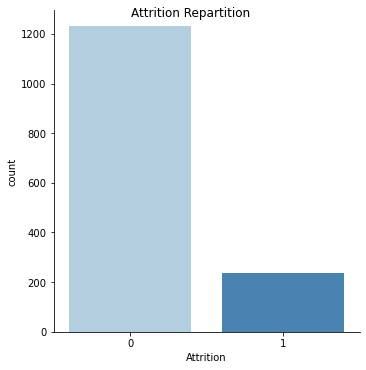

In [33]:
sns.set_palette("Blues",2)
ax=sns.catplot(x="Attrition", kind="count",  data=df1)
ax.fig.suptitle('Attrition Repartition')

> We will use the method in the train and test split part below

## Train and Test Split 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
Y=df1['Attrition']
X=df1.drop('Attrition', axis=1)
X_scaled=df2.drop('Attrition', axis=1)

> **For the df1 dataset (not rescaled)**

In [36]:
from imblearn.over_sampling import SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train,Y_train=os.fit_sample(X_train, Y_train)

In [37]:
Y_train.value_counts()

1    988
0    988
Name: Attrition, dtype: int64

In [38]:
print('The number of rows in the training set is',Y_train.shape[0],'.\nThe number of rows in the test set is', Y_test.shape[0], '.')

The number of rows in the training set is 1976 .
The number of rows in the test set is 294 .


> **For the df2 dataset (rescaled)**

In [39]:
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)
os = SMOTE(random_state=0)
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)
X_train_scaled,Y_train=os.fit_sample(X_train_scaled, Y_train)

In [40]:
Y_train.value_counts()

1    988
0    988
Name: Attrition, dtype: int64

In [41]:
print('The number of rows in the training set is',X_train_scaled.shape[0],'.\nThe number of rows in the test set is', Y_test.shape[0], '.')

The number of rows in the training set is 1976 .
The number of rows in the test set is 294 .


## Drop a reference variable for dummy variables. 

> **For the non-rescaled database**

In [42]:
var_to_drop=['Non_Travel', 'Human_Resources_Job', 'Single', 'Other_Field','Below_College','EnvironmentSatisfaction_2','JobInvolvement_2', 'JobSatisfaction_2', 'RelationshipSatisfaction_2', 'WorkLifeBalance_2']
x_train=X_train.drop(var_to_drop, axis=1)
x_test=X_test.drop(var_to_drop, axis=1)

> **For the rescaled database**

In [43]:
x_train_scaled=X_train_scaled.drop(var_to_drop, axis=1)
x_test_scaled=X_test_scaled.drop(var_to_drop, axis=1)

# <br><br>2) Descriptive statistics 

### Basic description

Beyond trying to predict an employee's attrition, it would be useful to know the reasons why he or she is leaving. <br> This is why we make a few descriptive statistics in order to state a few facts and get an idea of the results afterwards. <br> From an economic point of view the aim of this work is to help human resources not to lose valuable talent in their company.

In [44]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,...,15.209524,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,...,3.659938,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,11.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,...,12.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,...,14.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,...,18.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,25.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [45]:
sns.catplot(x=Attrition,hue="Attrition", kind="count", data=df)

NameError: name 'Attrition' is not defined

### Attrition vs quantitative variables, one by one. 

##### Swarm plots <br>
It adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations.

C:\Users\Station\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Station\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Station\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Station\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Station\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.0% of t

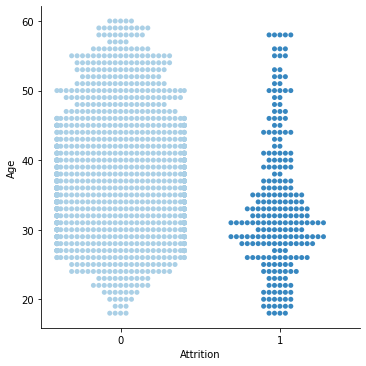

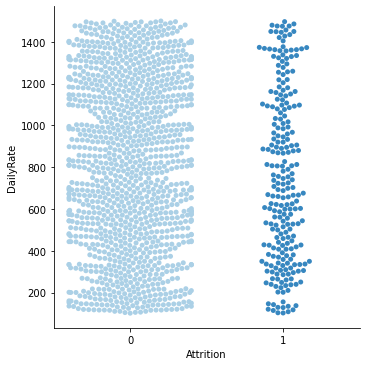

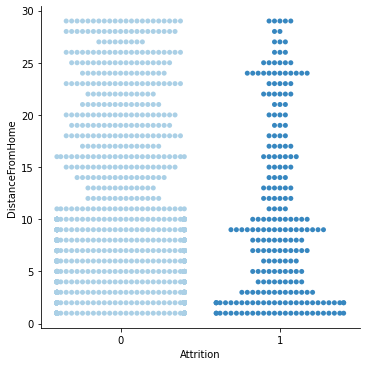

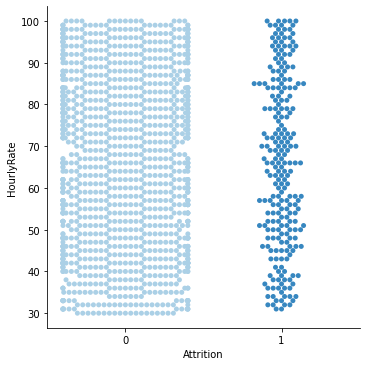

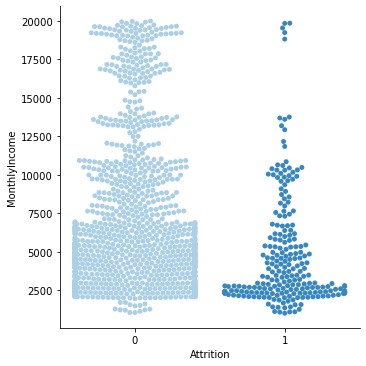

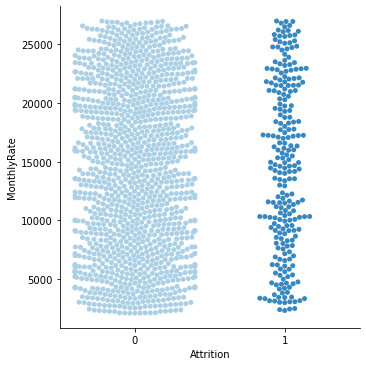

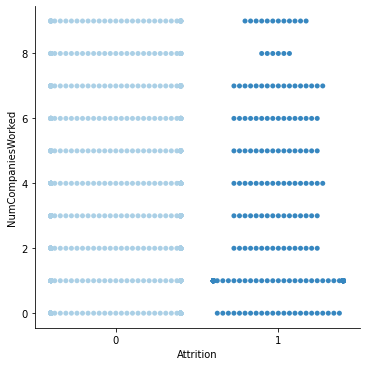

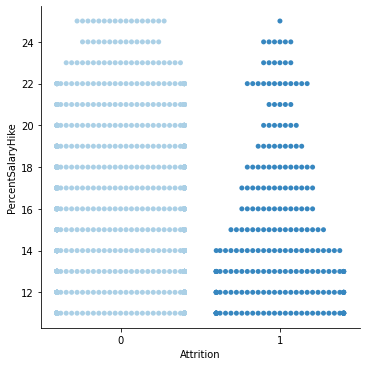

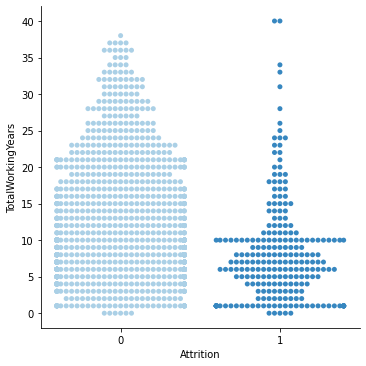

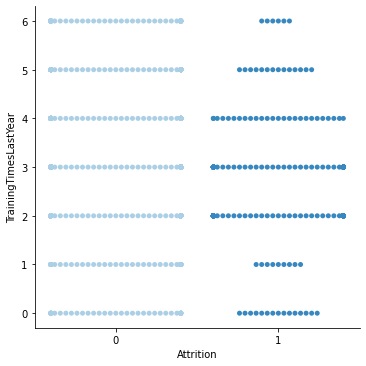

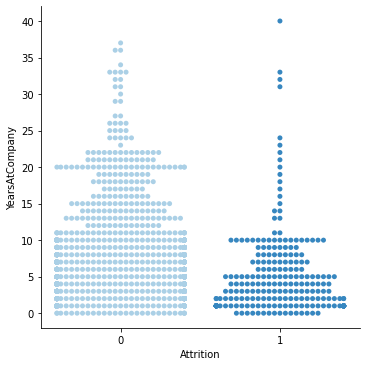

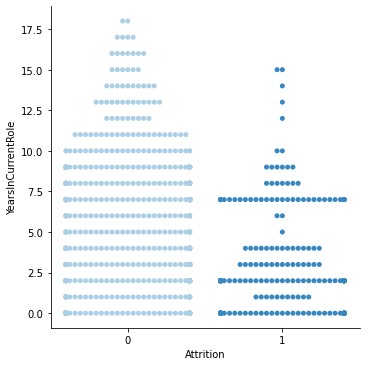

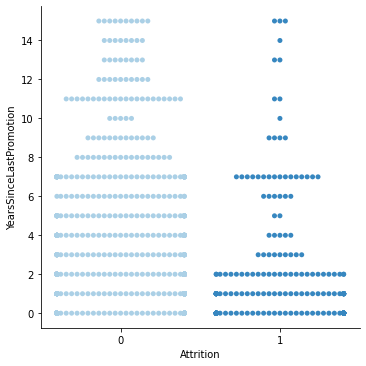

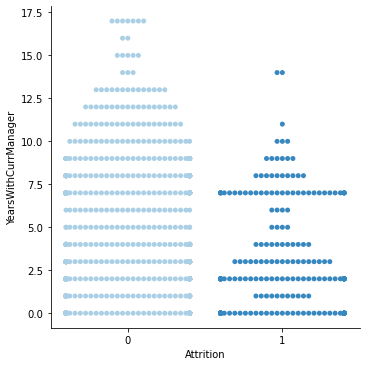

In [46]:
for i in headers:
    sns.catplot(x="Attrition", y=i, kind="swarm", data=df1)

- **Age** : not a huge correlation, from every age there is attrition or not. But we can see that there are more young people (25-38) than other age **in the attrition class**. 
- **DistanceFromHome**: there is attrition or not for every distance from home. **In the attrition class**, the distribution of the variable DistanceFromHome is mostly in the small distance. 
- **HourlyRate**: no correlation shows in the plot. 
- **MonthlyIncome**: it seems that people with a really high monthly income (>14000) are not concerned by attrition -> the monthly income can play a role. 
- **NumCompaniesWorked** : **In the attrition class**, people who did not work in many compagnies are more present than people that have been working in many companies but that's a small effect. 
- **PercentSalaryHike**: doesn't play a role between attrition=0 or attrition=1 but in the attrition class: more people that have a low PercentSalaryHike. 
- **TotalWorkingYears**: In the attrition class people that havn't worked a lot of years are more present then others. 
- **TrainingTimesLastYear**: no correlation shows in the plot.
- **YearsAtCompany**: Over 15 years in the company we can't see many people in the attrition class.
- **YearsInCurrentRole:**: There is more attrition for people who don't spent many years in the same role. 
- **YearsSinceLastPromotion**: surprising that in the attrition class there are more people that has a promotion recently than oldly. 
- **YearsWithCurrManager**: in the attrition class, more people that have a recent manager than one for many years (but this variable must be confronted to the number of years in the company). 

### Attrition vs qualitative variables, one by one. 

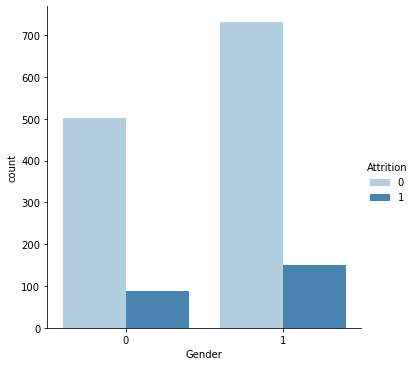

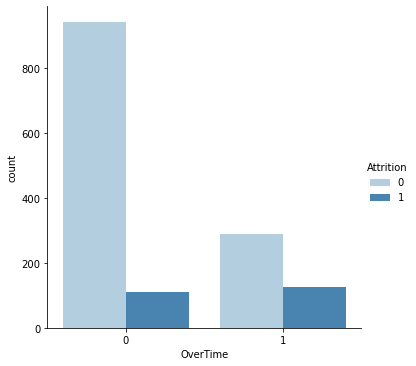

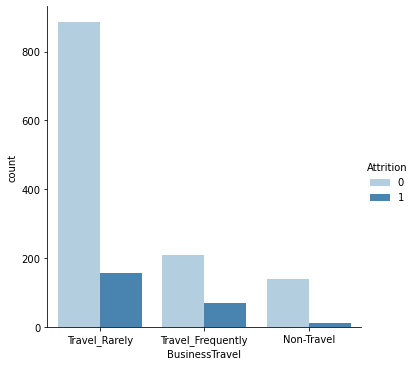

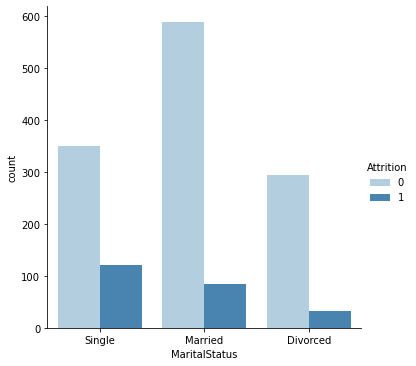

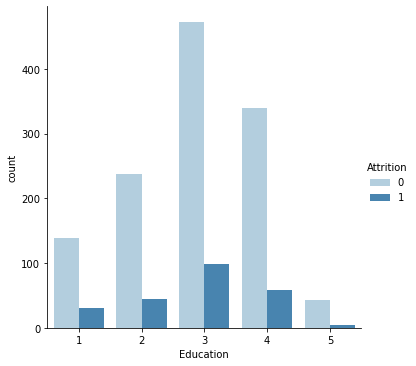

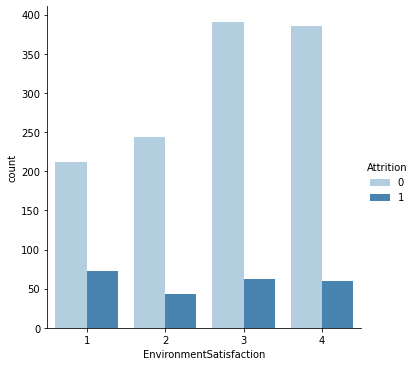

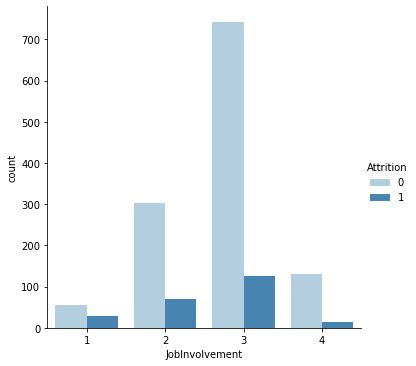

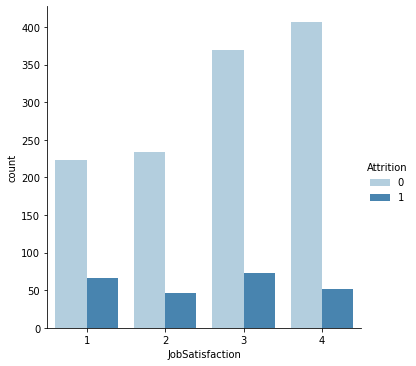

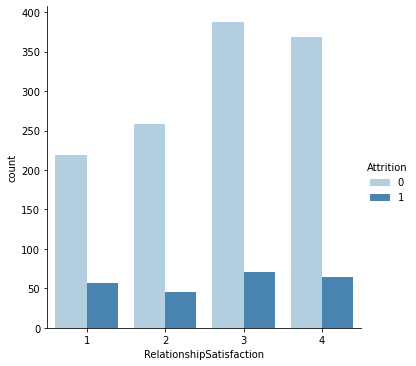

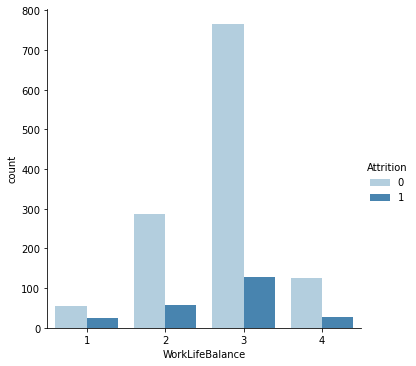

In [47]:
quali=['Gender',"OverTime",'BusinessTravel','MaritalStatus',"Education","EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction","RelationshipSatisfaction", "WorkLifeBalance"]
for i in quali:
    sns.catplot(x=i,hue="Attrition", kind="count", data=df)

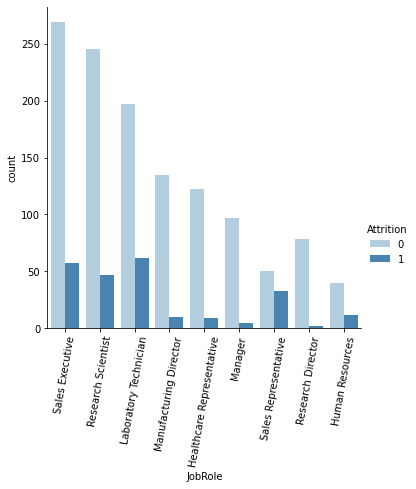

In [48]:
g=sns.catplot(x="JobRole",hue="Attrition",kind="count", data=df)
g.set_xticklabels(rotation=80)

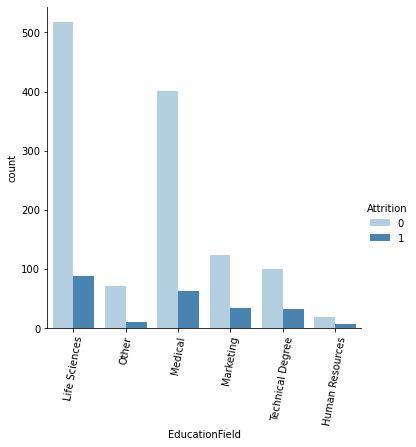

In [49]:
g=sns.catplot(x="EducationField",hue="Attrition",kind="count", data=df)
g.set_xticklabels(rotation=80)

- **Gender**: The repartition attrition/ no attrition for male or female seems to be the same. 
- **Overtime**: There are more people that do overtime in the attrition class.
- **People**: There are more people that travel rarely in the attrition class (but they are the majority). 
- **JobRole**: Attrition seems to concern any job role. 
- **MaritalStatus**: Divorced people are less concern by attrition than single or married people. 
- **EducationField**: as JobRole. 
- **Education**: The repartition attrition/no attrition for the different level of education seems to be the same (even if there are more employee with a bachelor in the attrition class. 
- **EnvironmentSatisfaction**: Employee that are not satisfied of their environment are more concern by attrition. 
- **JobInvolvment**: Employee with a high job involvment are more present in the attrition class. 
- **JobSatisfaction**: looking at the repartition attrition/no attriton, employee with a low satisfaction of their job are more likely to leave regarding other categories. 
- **RelationshipSatisfaction**: same as JobSatisfaction. 
- **WorkLifeBalance**: same as before. 

### Attrition vs several variables in the same graph. 

> We can't do this for every variables but let's see the monthly income in dollars vs the gender regarding the attrition. 

##### MonthlyIncome vs Gender + regarding the attrition. 

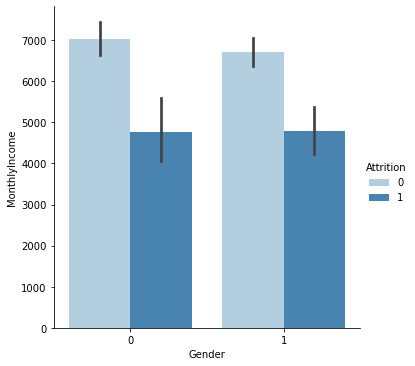

In [50]:
sns.catplot(x="Gender", y="MonthlyIncome", hue="Attrition", kind="bar", data=df)

> 1 if it's a men. Same attrition even if women have a higher Monthly Income. 

# <br><br>3) Econometrics part

> In econometrics, the number of variables is very important. Actually, if the number of variables (p) is equal, higher or very near to the number of obersvations (n), then an OLS regression would not work. <br> Moreover, if one increase the number of features, one could have less errors but it does not mean that the model provides better forecasts : this is the problem of over-fitting.<br> In our case, the aim of our framework is to provide some classification so we will not use OLS regression. However, we will take into account these issues and deal with overfitting. At this step we have **52 variables**. We are going to select the most important ones with Principal Component Analysis and then Forward Stepwise Selection. <br>Then, we will create new features to take into account non-linearities and use selection models to keep the most importants.

##      A) An initial variables selection
###           A.1) Principal Component Analysis (PCA)

PCA is a mathematical technique to rewrite a **complex system of correlations** thanks to linear combinations of the variables. <br> The aim is to **reduce the information** (p variables into m << p factors).<br> Often, these linear combinations are interpretable. <br> **Method**: Choose the weights ai’s such that the first linear combination maximizes the variance of the PC, such that this linear combination has the maximum variability in the direction of the correlation, such that X’s are uncorrelated.
<br>In this application, we will compute PCA only from **quantitative variables**, actually 14 variables.

In [51]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
acp

PCA(svd_solver='full')

In [52]:
var_to_drop=['Non_Travel', 'Human_Resources_Job', 'Single', 'Other_Field','Below_College','EnvironmentSatisfaction_2','JobInvolvement_2', 'JobSatisfaction_2', 'RelationshipSatisfaction_2', 'WorkLifeBalance_2']
X_scaled = X_scaled.drop(var_to_drop, axis = 1)
x_train_quanti = [X_scaled['Age'],
 X_scaled['DailyRate'],
 X_scaled['DistanceFromHome'],
 X_scaled['HourlyRate'],
 X_scaled['MonthlyIncome'],
 X_scaled['MonthlyRate'],
 X_scaled['NumCompaniesWorked'],
 X_scaled['PercentSalaryHike'],
 X_scaled['TotalWorkingYears'],
 X_scaled['TrainingTimesLastYear'],
 X_scaled['YearsAtCompany'],
 X_scaled['YearsInCurrentRole'],
 X_scaled['YearsSinceLastPromotion'],
 X_scaled['YearsWithCurrManager']]

In [53]:
headers= ['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
x_train_quanti = pd.concat(x_train_quanti, axis=1, keys=headers)

> Reminder of the correlation table in the section 1) Data Preparation. 

<AxesSubplot:>

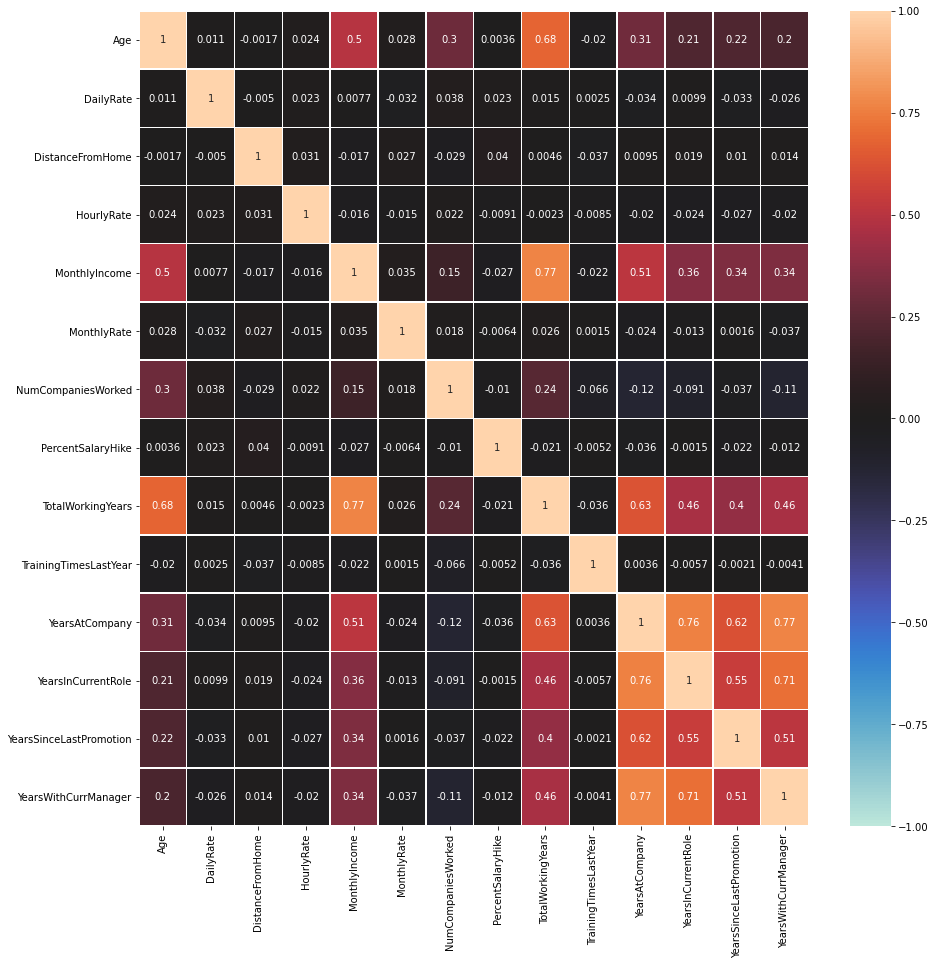

In [54]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(x_train_quanti.corr(), annot=True, linewidths=.5, ax=ax, vmin=-1, vmax=1, center= 0)

> Some pairplots for quantitative variables. 

In [55]:
x_train_quanti_corr = pd.concat([x_train_quanti], axis=1, keys=headers)

Here are the quantitative variables rescaled that we use. 

In [56]:
x_train_quanti_corr_scaled = preprocessing.scale(x_train_quanti_corr)
x_train_quanti_corr_scaled=pd.DataFrame(x_train_quanti_corr_scaled)
x_train_quanti_corr_scaled.columns = [headers]
x_train_quanti_corr_scaled.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [57]:
coord = acp.fit_transform(x_train_quanti_corr_scaled)
print(acp.n_components_) 

14


In [58]:
print(acp.explained_variance_ratio_)

[0.28691241 0.1178718  0.07632173 0.07515143 0.07210077 0.07088985
 0.06809641 0.0655355  0.05160467 0.03790696 0.03356039 0.02023023
 0.01381314 0.0100047 ]


In [59]:
np.cumsum(acp.explained_variance_ratio_)

array([0.28691241, 0.40478422, 0.48110594, 0.55625738, 0.62835815,
       0.699248  , 0.7673444 , 0.8328799 , 0.88448457, 0.92239154,
       0.95595193, 0.97618216, 0.9899953 , 1.        ])

> We can see that using the 9 first principal components, we can keep almost 90% of the information of the 14 variables. 

**Scree plot**

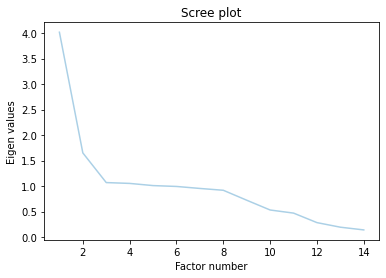

In [60]:
n = x_train_quanti_corr_scaled.shape[0]
eigval = (n-1)/n*acp.explained_variance_
p = x_train_quanti_corr_scaled.shape[1]
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

A scree plot, is a diagnostic tool to check whether PCA works well on the data or not. <br> Principal components are created in order of the amount of variation they cover: PC1 captures the most variation, PC2 — the second most, and so on.<br> Each of them contributes some information of the data, and in a PCA, there are as many principal components as there are characteristics. Leaving out PCs and we lose information.

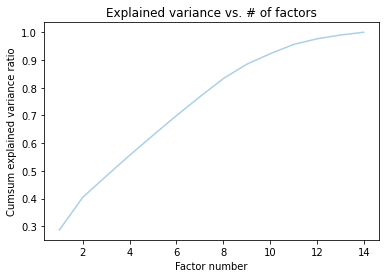

In [61]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

> The higher the factor number, the higher the cummulative sum of explained variance ratio. 

In [62]:
from mlxtend.plotting import plot_pca_correlation_graph

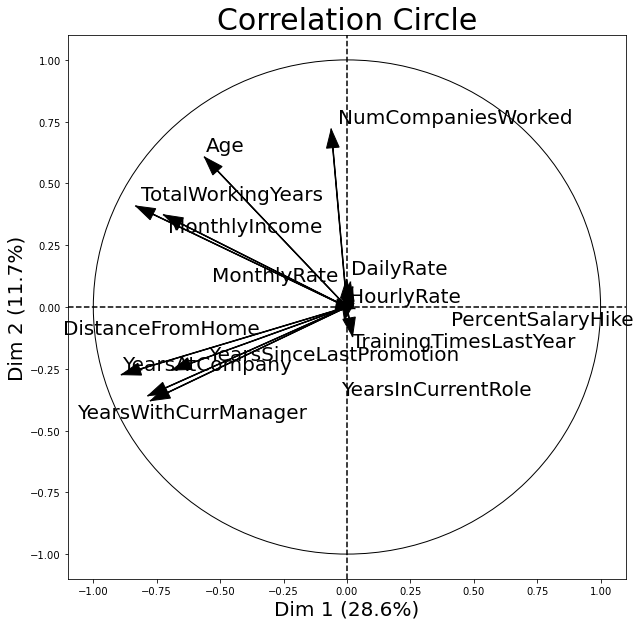

In [63]:
figure, correlation_matrix = plot_pca_correlation_graph(x_train_quanti_corr_scaled, 
                                                        headers,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

Here is the correlation plot of the variables for PC1 and PC2.<br> It is difficult to isolate groups of variables. <br>What we can say is that **Years at the company** and **Monthly Rate** seem to be highly correlated with PC1 and **Total Working Years** quite highly correlated with PC1.

In [64]:
from mlxtend.feature_extraction import PrincipalComponentAnalysis
pca = PrincipalComponentAnalysis(n_components=None)
pca.fit(x_train_quanti_corr_scaled)
X_pca = pca.transform(x_train_quanti_corr_scaled)

In [65]:
pca.e_vals_normalized_

array([0.28691241, 0.1178718 , 0.07632173, 0.07515143, 0.07210077,
       0.07088985, 0.06809641, 0.0655355 , 0.05160467, 0.03790696,
       0.03356039, 0.02023023, 0.01381314, 0.0100047 ])

In [66]:
tot = sum(pca.e_vals_)
var_exp = [(i / tot)*100 for i in sorted(pca.e_vals_, reverse=True)]
cum_var_exp = np.cumsum(pca.e_vals_normalized_*100)

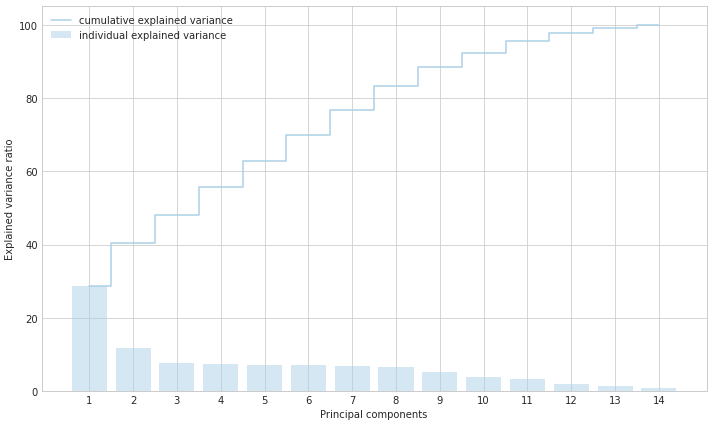

In [67]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(range(14), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(14), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(14))
    ax.set_xticklabels(np.arange(1, x_train_quanti_corr_scaled.shape[1] + 1))
    plt.legend(loc='best')
    plt.tight_layout()

We can see that **the 9 first principal components** explain approximatively **90% of the variance**. <br> It implies that we ould use these 9 principal component to bring to the model almost all the information brought by our 14 initial variables : we could reduce the number of variables in the model by only using the four PCs.

In [68]:
X_pca.rename(columns={0:'PC1',1:'PC2', 2:'PC3', 3:'PC4', 4:'PC5', 5:'PC6', 6:'PC7', 7:'PC8', 8:'PC9',
                      9:'PC10', 10:'PC11', 11:'PC12', 12:'PC13', 13:'PC14'}, inplace = True)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.243127,1.805911,0.310523,-0.385125,2.017644,0.985129,-1.332584,-1.592316,1.186751,0.872418,0.096438,-0.165325,0.269891,0.561889
1,-0.854579,-0.381203,0.525418,1.609193,-1.593286,-0.482030,1.043580,-1.440104,-0.291620,0.913626,1.270928,0.122427,0.300481,0.392781
2,2.199023,1.413783,0.058248,-2.597685,0.602447,-0.023239,0.244905,-0.164601,0.703957,-0.233508,0.206381,-0.075744,-0.203488,-0.030281
3,0.571040,-0.682526,-0.953403,-0.112556,0.014426,-0.415376,-2.255445,-0.378977,-0.023222,-0.448527,0.425742,1.190948,-0.589079,0.037618
4,1.568219,0.965767,-1.643331,0.537230,-0.070340,0.940880,-0.332724,0.211081,2.314073,0.009286,-0.791408,-0.093246,-0.100216,-0.014655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.738597,0.533437,0.911536,0.455155,-1.056850,0.284777,-0.036142,1.673828,0.286884,0.419428,0.156681,-0.315884,-0.784592,-0.700529
1466,-0.706584,-0.020829,-1.494702,0.828488,-1.203476,-0.908706,-0.054890,0.308165,0.597268,0.943419,-0.295154,0.154333,0.869004,0.334669
1467,1.305841,-0.645498,1.112744,-0.074449,0.815945,1.905724,1.946110,-1.549214,-0.871444,0.086913,-0.730190,-0.120456,-0.131203,0.196770
1468,-1.100249,0.287168,-0.678831,-0.733437,-0.095151,0.004103,-0.302582,-0.231968,-0.488426,1.179357,1.197920,-0.286097,0.103371,-0.263887


Let's replace our 14 quantitative variables by the 9 first components.

In [69]:
df_quanti_scaled_pc = X_pca.iloc[:,0:9]
df_quanti_scaled_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.243127,1.805911,0.310523,-0.385125,2.017644,0.985129,-1.332584,-1.592316,1.186751
1,-0.854579,-0.381203,0.525418,1.609193,-1.593286,-0.482030,1.043580,-1.440104,-0.291620
2,2.199023,1.413783,0.058248,-2.597685,0.602447,-0.023239,0.244905,-0.164601,0.703957
3,0.571040,-0.682526,-0.953403,-0.112556,0.014426,-0.415376,-2.255445,-0.378977,-0.023222
4,1.568219,0.965767,-1.643331,0.537230,-0.070340,0.940880,-0.332724,0.211081,2.314073
...,...,...,...,...,...,...,...,...,...
1465,0.738597,0.533437,0.911536,0.455155,-1.056850,0.284777,-0.036142,1.673828,0.286884
1466,-0.706584,-0.020829,-1.494702,0.828488,-1.203476,-0.908706,-0.054890,0.308165,0.597268
1467,1.305841,-0.645498,1.112744,-0.074449,0.815945,1.905724,1.946110,-1.549214,-0.871444
1468,-1.100249,0.287168,-0.678831,-0.733437,-0.095151,0.004103,-0.302582,-0.231968,-0.488426


In [70]:
dfff =  X_scaled.drop(headers, axis = 1)
df_pc = pd.concat([dfff, df_quanti_scaled_pc], axis = 1)
df_pc.head()

,Men,OverTime,Travel_Frequently,Travel_Rarely,Healthcare_Representative,Laboratory_Technician,JobRole_Manager,Manufacturing_Director,Research_Director,Research_Scientist,...,WorkLifeBalance_4,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0,1,0,1,0,0,0,0,0,0,...,0,0.243127,1.805911,0.310523,-0.385125,2.017644,0.985129,-1.332584,-1.592316,1.186751
1,1,0,1,0,0,0,0,0,0,1,...,0,-0.854579,-0.381203,0.525418,1.609193,-1.593286,-0.482030,1.043580,-1.440104,-0.291620
2,1,1,0,1,0,1,0,0,0,0,...,0,2.199023,1.413783,0.058248,-2.597685,0.602447,-0.023239,0.244905,-0.164601,0.703957
3,0,1,1,0,0,0,0,0,0,1,...,0,0.571040,-0.682526,-0.953403,-0.112556,0.014426,-0.415376,-2.255445,-0.378977,-0.023222
4,1,0,0,1,0,1,0,0,0,0,...,0,1.568219,0.965767,-1.643331,0.537230,-0.070340,0.940880,-0.332724,0.211081,2.314073


In [71]:
os = SMOTE(random_state=0)
x_train_pc, x_test_pc, Y_train, Y_test = train_test_split(df_pc, Y, test_size=0.2, random_state=0)
x_train_pc,Y_train=os.fit_sample(x_train_pc, Y_train)
Y_train.value_counts()

1    988
0    988
Name: Attrition, dtype: int64

We have created a new dataframe with the 14 quantitative variables replaced by th 9 first principal components. Then, we have applied the function SMOTE to create new train and test set with these new variables. Now, we are going to use the Selection algorithm to get the more relevant features.

###           A.2) Best Subset Selection (BSS)

##### Idea : make all possible models and select the best one depending on criteria. There are 3 steps : 

- 1) Build the simpliest model : no predictors (predict the sample mean for each observation).

- 2) For each value of k (the number of predictors), fit all the possible models (each model is a different combination of predictors for a given value of k) and pick the best one.

- 3) Select the best among each best model for each value of k.

In [72]:
import itertools
import time
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

##### We create a function that builds a logistic regression depending on parameters X (train set) and Y (predicted variable) and compute its RSS and R_squared.

In [73]:
def processSubset(X,Y):
    # Fit model on feature_set and calculate RSS
    model_k = linear_model.LogisticRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = ((model_k.predict(X) - Y) ** 2).sum()
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

> Example for a model with all the predictors.

In [74]:
processSubset(x_train_pc, Y_train)

(191, 0.90334008097166)

##### Step 1 and 2 in the same algorithm, we compute all possible models for each value of k
Problem : we have 52 features, that implies that we will **build 2^52 models** = 4,50e+15 models that is huge... Hence, we cannot run this algorithm in our case, it would take maybe several days... Let's apply it for a small maximum number of features in the aim to see how it works.

We have tried this method for a maximum number of features of k = 5 that makes the algorithm build **32 models**. The running time was very long : more than **1 hour and half...** We hence avoided this method and will need to find other techniques to select the best model without waiting such a long time.

### A.3) Forward Stepwise Selection

Here, we do not create and evaluate all the models. It is less heavy and more quick but it can fail. <br> For example, the best model with one variable is M1 = X1 and the best model with two variable is M2 = X2 + X3 because if X1 is selected, it keep on being in models. 

##### 1) Step 1 and 2 in the same cell : for k = 0,1, ..., N-1, we consider all N-k models that augment the predictors in Mk with one additional predictor and we choose the best among these N-k models. The best one is the one that has the smallest RSS or highest R-squared. Then, we select a single best model from among these ones.

In [75]:
#Variables Initialization 
Y1 = Y_train
X = x_train_pc
k = 47
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = processSubset(X[list(combo) + features],Y1)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

###### 2) We combine our results in a DataFrame : 1 model for each value of k

In [76]:
FSS = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
FSS['numb_features'] = FSS.index
FSS

,features,RSS,R_squared,numb_features
1,[Married],734.0,0.628543,1
2,"[Married, Divorced]",558.0,0.717611,2
3,"[Married, Divorced, JobSatisfaction_4]",525.0,0.734312,3
4,"[Married, Divorced, JobSatisfaction_4, Healthc...",507.0,0.743421,4
5,"[Married, Divorced, JobSatisfaction_4, Healthc...",493.0,0.750506,5
6,"[Married, Divorced, JobSatisfaction_4, Healthc...",462.0,0.766194,6
7,"[Married, Divorced, JobSatisfaction_4, Healthc...",446.0,0.774291,7
8,"[Married, Divorced, JobSatisfaction_4, Healthc...",433.0,0.780870,8
9,"[Married, Divorced, JobSatisfaction_4, Healthc...",423.0,0.785931,9
10,"[Married, Divorced, JobSatisfaction_4, Healthc...",379.0,0.808198,10


> We can see that the model with **42 variables**  is the best, according to the R_squared and the Residuals Sum of Squares (RSS).

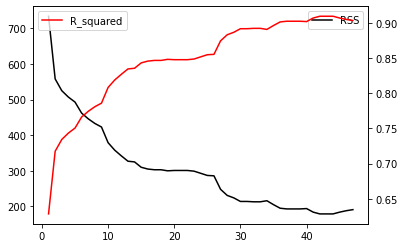

In [77]:
fig, ax1 = plt.subplots()
ax1.plot(FSS['numb_features'], FSS['RSS'], color = 'black', label = "RSS")
ax1.legend()

ax2 = ax1.twinx()

ax2.plot(FSS['numb_features'], FSS['R_squared'], color = 'red', label = "R_squared")
ax2.legend()
plt.show()

We cannot just trust the RSS and the R_squared because the more we have variables in our model, the highest the R_squared and the smaller the RSS --> We need to find other **criteria that penalizes for the number of variables.**

##### 3) Step 3 : we choose the best model by computing C_p, AIC, BIC and R-squared adjusted

In [78]:
#Initializing useful variables
m = len(Y1)
p = 62
hat_sigma_squared = (1/(m - p -1)) * min(FSS['RSS'])

#Computing
FSS['C_p'] = (1/m) * (FSS['RSS'] + 2 * FSS['numb_features'] * hat_sigma_squared )
FSS['AIC'] = (1/(m*hat_sigma_squared)) * (FSS['RSS'] + 2 * FSS['numb_features'] * hat_sigma_squared )
FSS['BIC'] = (1/(m*hat_sigma_squared)) * (FSS['RSS'] +  np.log(m) * FSS['numb_features'] * hat_sigma_squared )
FSS['R_squared_adj'] = 1 - ((1 - FSS['R_squared'])*(m-1)/(m-FSS['numb_features'] -1))
FSS

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[Married],734.0,0.628543,1,0.371552,3.970834,3.973663,0.628354
2,"[Married, Divorced]",558.0,0.717611,2,0.282578,3.019955,3.025611,0.717325
3,"[Married, Divorced, JobSatisfaction_4]",525.0,0.734312,3,0.265972,2.842487,2.850972,0.733908
4,"[Married, Divorced, JobSatisfaction_4, Healthc...",507.0,0.743421,4,0.256958,2.746146,2.757460,0.742900
5,"[Married, Divorced, JobSatisfaction_4, Healthc...",493.0,0.750506,5,0.249967,2.671440,2.685582,0.749873
6,"[Married, Divorced, JobSatisfaction_4, Healthc...",462.0,0.766194,6,0.234374,2.504789,2.521759,0.765482
7,"[Married, Divorced, JobSatisfaction_4, Healthc...",446.0,0.774291,7,0.226371,2.419266,2.439064,0.773489
8,"[Married, Divorced, JobSatisfaction_4, Healthc...",433.0,0.780870,8,0.219887,2.349968,2.372595,0.779979
9,"[Married, Divorced, JobSatisfaction_4, Healthc...",423.0,0.785931,9,0.214921,2.296895,2.322350,0.784951
10,"[Married, Divorced, JobSatisfaction_4, Healthc...",379.0,0.808198,10,0.192749,2.059934,2.088218,0.807222


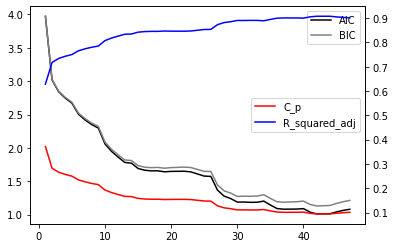

In [79]:
fig, ax1 = plt.subplots()
ax1.plot(FSS['numb_features'], FSS['AIC'], color = 'black', label = "AIC")
ax1.plot(FSS['numb_features'], FSS['BIC'], color = 'grey', label = "BIC")
ax1.legend()

ax2 = ax1.twinx()

ax2.plot(FSS['numb_features'], FSS['C_p'], color = 'red', label = "C_p")
ax2.plot(FSS['numb_features'], FSS['R_squared_adj'], color = 'blue', label = "R_squared_adj")
ax2.legend()
plt.show()

##### 4) Let's select the best model

Plot the criteria depending on the number of features

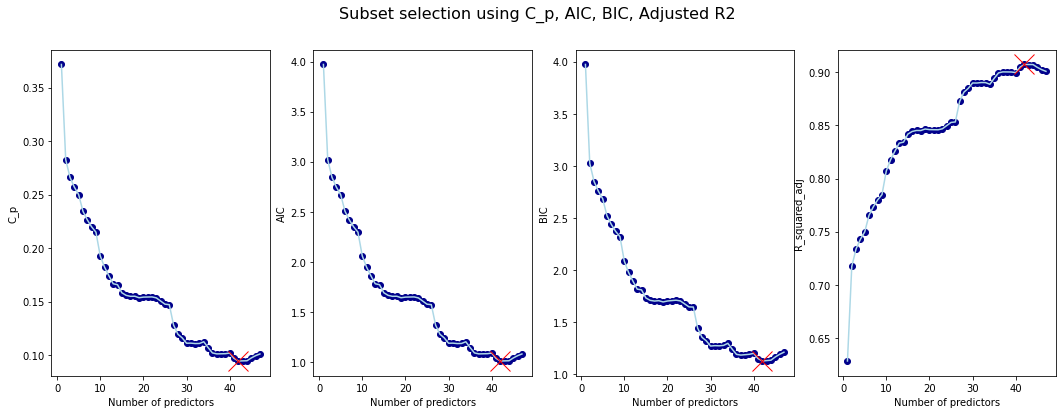

In [80]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(FSS['numb_features'],FSS[v], color = 'lightblue')
    ax.scatter(FSS['numb_features'],FSS[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(FSS[v].idxmax(),FSS[v].max(), marker = 'x', color = "red", markersize = 20)
    else:
        ax.plot(FSS[v].idxmin(),FSS[v].min(), marker = 'x', color = "red", markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

Let's look for the number of features that minimizes the AIC, BIC and C_p and maximizes the R-squared adjusted

In [81]:
FSS.loc[FSS['C_p'].idxmin()]

features         [Married, Divorced, JobSatisfaction_4, Healthc...
RSS                                                            179
R_squared                                                 0.909413
numb_features                                                   42
C_p                                                      0.0945647
AIC                                                        1.01063
BIC                                                        1.12942
R_squared_adj                                             0.907445
Name: 42, dtype: object

> The model that minimizes C_p is the model with 42 variables. 

In [82]:
FSS.loc[FSS['AIC'].idxmin()]

features         [Married, Divorced, JobSatisfaction_4, Healthc...
RSS                                                            179
R_squared                                                 0.909413
numb_features                                                   42
C_p                                                      0.0945647
AIC                                                        1.01063
BIC                                                        1.12942
R_squared_adj                                             0.907445
Name: 42, dtype: object

> The model that minimizes AIC is the model with 42 variables.  

In [83]:
FSS.loc[FSS['BIC'].idxmin()]

features         [Married, Divorced, JobSatisfaction_4, Healthc...
RSS                                                            179
R_squared                                                 0.909413
numb_features                                                   42
C_p                                                      0.0945647
AIC                                                        1.01063
BIC                                                        1.12942
R_squared_adj                                             0.907445
Name: 42, dtype: object

> The model that minimizes BIC is the model with 42 variables. 

In [84]:
FSS.loc[FSS['R_squared_adj'].idxmax()]

features         [Married, Divorced, JobSatisfaction_4, Healthc...
RSS                                                            179
R_squared                                                 0.909413
numb_features                                                   42
C_p                                                      0.0945647
AIC                                                        1.01063
BIC                                                        1.12942
R_squared_adj                                             0.907445
Name: 42, dtype: object

> The model that maximizes the adjusted R² is the model with 42 variables. 

All criteria are unanimous : the best model is the one with 42 variables. Let's create a new dataframe with only 42 variables and apply SMOTE again.

In [85]:
df_pc_42 = FSS.loc[42][0]
df_pc_42 = df_pc[df_pc_42]
df_pc_42.shape

(1470, 42)

In [86]:
os = SMOTE(random_state=0)
x_train_pc42, x_test_pc42, Y_train, Y_test = train_test_split(df_pc_42, Y, test_size=0.2, random_state=0)
x_train_pc42,Y_train=os.fit_sample(x_train_pc42, Y_train)
Y_train.value_counts()

1    988
0    988
Name: Attrition, dtype: int64

***Note***: Another method is **Backward Stepwise Selection**, which is the same as Forward Stepwise Selection but done differently : we start with the full model and at each iteration, we remove the variable that is the least statistically significant. <br> We will not apply it to our database because it has the sames advantages as FSS (*it is quite fast and accurate*) and the same disadvantages (*it can fail when for example, the best model for k = 2 does not contain the variable used in the best model for k = 1*).

##      B) Estimating econometric models and an additonal variables selection
###           B.1) Taking into account non-linearities

Non-linearities are an issue that is complicated to deal with. We must wonder if there is a perfect linear relation between these quantitative variables and the target variable. Actually, it is very rare, so we have to check it and, if it is not the case, take into account non-linearities. We have to consider 6 questions :

- How do I decide what order of polynomial to try to fit? 
- Do I need to include cross-coupling terms for multivariate regression? 
- Is there an easy way to automate the process?
- How to ensure I don’t overfit to the data?
- Is my machine learning model robust against measurement noise?
- Is my model easily scalable to higher dimensions and/or to bigger data set?

> Website : https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49

A solution is to look at the plots of each feature with the target variable, and determine whether or not there is a linear relationship. But as we have a lot of variables, and we found this solution a little bit unprecise, we aimed to work differently.

To cleverly add variables that catch non-linearities without overfitting the data, we can use the Lasso Regression and Elastic Net. Hence, we will deal with this issue later, in the "Automatic Selection Model" part.
Hence, we are going to create new features by : creating variables by elevating all our quantitative variables at the power 2 and 3 and cross all of them (our quantitative variables are PC1, PC2, PC3, PC5, PC7 and PC9, selected previously by FSS). Next, we will add these new variables in the dataframe and we will apply a logistic regression with the l1 penalty term (a lasso method on a logistic regression) to select the variables that are the most useful. Hence we will do the same with elastic net and compare both approaches and select the best one. By this way, we could have get a model that takes into account a lot of non-linearities without overfitting, thanks to the penalization. However, to proove overfitting, we are going to build a logisitic regression and a ridge logistic regression with all the variables we would have created.

Nota bene : we wanted to elevate all our variables at power 2,3 but the code was too slow to run and it resulted in a huge amount of variables.

#### Creation of a dataframe with the initial variables, the cross features and features-squared

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

In [88]:
pc42 = df_pc_42[['PC1', 'PC2', 'PC3', 'PC5', 'PC7', 'PC9']]
pc42

,PC1,PC2,PC3,PC5,PC7,PC9
0,0.243127,1.805911,0.310523,2.017644,-1.332584,1.186751
1,-0.854579,-0.381203,0.525418,-1.593286,1.043580,-0.291620
2,2.199023,1.413783,0.058248,0.602447,0.244905,0.703957
3,0.571040,-0.682526,-0.953403,0.014426,-2.255445,-0.023222
4,1.568219,0.965767,-1.643331,-0.070340,-0.332724,2.314073
...,...,...,...,...,...,...
1465,0.738597,0.533437,0.911536,-1.056850,-0.036142,0.286884
1466,-0.706584,-0.020829,-1.494702,-1.203476,-0.054890,0.597268
1467,1.305841,-0.645498,1.112744,0.815945,1.946110,-0.871444
1468,-1.100249,0.287168,-0.678831,-0.095151,-0.302582,-0.488426


In [89]:
poly = PolynomialFeatures(3,include_bias=False)

In [90]:
X_poly = poly.fit_transform(pc42)
hdrs = pc42.columns
hdrs = np.reshape(hdrs, (6,1))

In [91]:
hdrs = pd.DataFrame(hdrs, columns = ['name'])
hdrs

,name
0,PC1
1,PC2
2,PC3
3,PC5
4,PC7
5,PC9


In [92]:
X_poly_feature_name = []
for i in range(0,6):
    X_poly_feature_name.append(hdrs.iloc[i][0])
X_poly_feature_name = X_poly_feature_name
X_poly_feature_names = poly.get_feature_names(X_poly_feature_name)
len(X_poly_feature_names)

83

In [93]:
df_pc_42

,Married,Divorced,JobSatisfaction_4,Healthcare_Representative,OverTime,Manufacturing_Director,Research_Director,JobRole_Manager,WorkLifeBalance_3,JobSatisfaction_3,...,JobInvolvement_1,Research_Scientist,Sales_Executive,Travel_Rarely,PC7,Men,Travel_Frequently,Bachelor,College,PC1
0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,-1.332584,0,0,0,1,0.243127
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1.043580,1,1,0,0,-0.854579
2,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0.244905,1,0,0,1,2.199023
3,1,0,0,0,1,0,0,0,1,1,...,0,1,0,0,-2.255445,0,1,0,0,0.571040
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,-0.332724,1,0,0,0,1.568219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,-0.036142,1,1,0,1,0.738597
1466,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,-0.054890,1,0,0,0,-0.706584
1467,1,0,0,0,1,1,0,0,1,0,...,0,0,0,1,1.946110,1,0,1,0,1.305841
1468,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,-0.302582,1,1,1,0,-1.100249


In [94]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_names)
df_poly_quali = df_pc_42.drop(['PC1', 'PC2', 'PC3', 'PC5', 'PC7', 'PC9'], axis = 1)
df_poly = pd.concat([df_poly, df_poly_quali], axis = 1)

In [95]:
df_poly

,PC1,PC2,PC3,PC5,PC7,PC9,PC1^2,PC1 PC2,PC1 PC3,PC1 PC5,...,EnvironmentSatisfaction_1,Laboratory_Technician,JobInvolvement_1,Research_Scientist,Sales_Executive,Travel_Rarely,Men,Travel_Frequently,Bachelor,College
0,0.243127,1.805911,0.310523,2.017644,-1.332584,1.186751,0.059111,0.439065,0.075496,0.490543,...,0,0,0,0,1,1,0,0,0,1
1,-0.854579,-0.381203,0.525418,-1.593286,1.043580,-0.291620,0.730305,0.325768,-0.449011,1.361588,...,0,0,0,1,0,0,1,1,0,0
2,2.199023,1.413783,0.058248,0.602447,0.244905,0.703957,4.835704,3.108941,0.128089,1.324795,...,0,1,0,0,0,1,1,0,0,1
3,0.571040,-0.682526,-0.953403,0.014426,-2.255445,-0.023222,0.326086,-0.389750,-0.544431,0.008238,...,0,0,0,1,0,0,0,1,0,0
4,1.568219,0.965767,-1.643331,-0.070340,-0.332724,2.314073,2.459312,1.514535,-2.577103,-0.110308,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.738597,0.533437,0.911536,-1.056850,-0.036142,0.286884,0.545525,0.393995,0.673258,-0.780587,...,0,1,0,0,0,0,1,1,0,1
1466,-0.706584,-0.020829,-1.494702,-1.203476,-0.054890,0.597268,0.499262,0.014718,1.056133,0.850357,...,0,0,0,0,0,1,1,0,0,0
1467,1.305841,-0.645498,1.112744,0.815945,1.946110,-0.871444,1.705221,-0.842917,1.453067,1.065494,...,0,0,0,0,0,1,1,0,1,0
1468,-1.100249,0.287168,-0.678831,-0.095151,-0.302582,-0.488426,1.210547,-0.315957,0.746883,0.104689,...,0,0,0,0,1,0,1,1,1,0


We have create a new dataframe by adding to the previous one all the variables squared and all cross variables, then we use SMOTE.

In [96]:
os = SMOTE(random_state=0)
xp_train_pc42, xp_test_pc42, Y_train, Y_test = train_test_split(df_poly, Y, test_size=0.2, random_state=0)
xp_train_pc42,Y_train=os.fit_sample(xp_train_pc42, Y_train)
Y_train.value_counts()

1    988
0    988
Name: Attrition, dtype: int64

### B.2) Basic Logistic Regression

In [97]:
logpoly = LogisticRegression(max_iter = 1000, random_state = 0)
logpoly.fit(xp_train_pc42, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [98]:
y_predlog = logpoly.predict(xp_test_pc42)
print('Accuracy of logistic regression classifier on test set: {:.8f}'.format(logpoly.score(xp_test_pc42, Y_test)))

Accuracy of logistic regression classifier on test set: 0.81632653


<AxesSubplot:title={'center':'Confusion matrix for Neural Network'}, xlabel='Predicted', ylabel='Actual'>

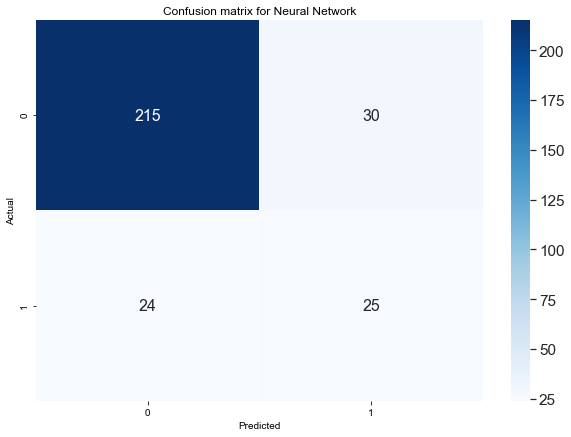

In [99]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
data = confusion_matrix(Y_test, y_predlog)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for Logistic Rgression')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})# font size

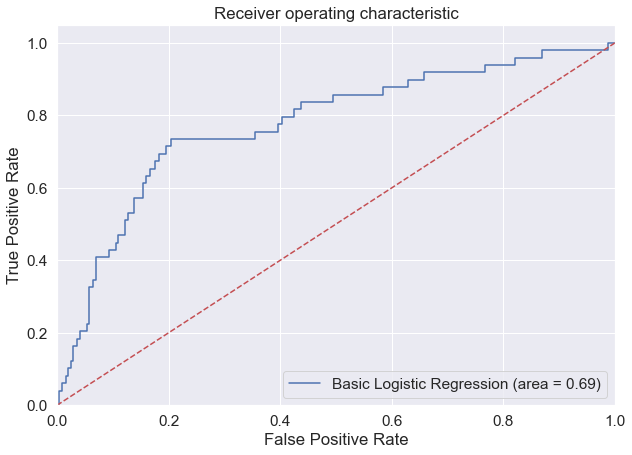

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, y_predlog)
fpr, tpr, thresholds = roc_curve(Y_test, logpoly.predict_proba(xp_test_pc42)[:,1])
plt.figure(figsize = (10,7))
plt.plot(fpr, tpr, label='Basic Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       245
           1       0.45      0.51      0.48        49

    accuracy                           0.82       294
   macro avg       0.68      0.69      0.68       294
weighted avg       0.83      0.82      0.82       294



In [157]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
logpolycoef = np.reshape(logpoly.coef_, (119, 1))
logcoef = pd.DataFrame(logpolycoef, columns = ["Coefficient"])
polcol = df_poly.columns
pcol = np.reshape(polcol, (119, 1))
pcol = pcol.tolist()
pcol = pd.DataFrame(pcol, columns = ["Name"])
coefpoly = pd.concat([pcol, logcoef], axis = 1)
coefpoly.set_index('Name')
coefpoly[coefpoly['Coefficient']!=0]

,Name,Coefficient
0,PC1,0.457117
1,PC2,-0.027108
2,PC3,0.835503
3,PC5,0.477254
4,PC7,0.360534
5,PC9,0.804440
6,PC1^2,0.142363
7,PC1 PC2,0.055772
8,PC1 PC3,-0.036212
9,PC1 PC5,-0.106701


We can see that the out-sample accuracy is good, surprisingly. However, it is obvious that the label 1 is less accurately predicted. Let's have a look at the Ridge Regression and then, at the selection models : Lasso and Elastic Net.

### B.3) Ridge Logistic Regression

**Ridge regression method** is one of the so-called *“shrinkage methods”*, which is usually applied to a regression model when there is instablity resulting from **collinearity of predictors**.

When the predictors are collinear or almost collinear, **the matrix Xtranspose * X**
here becomes *singular (rarely the case) or almost singular*, then the inverse would respond sensitively to errors, which results in instability of prediction with such a model.


Ridge regression, however, make a ***trade-off between bias and variance in prediction***. By introducing a relatively small bias, you may expect a large reduction in the variance, and thus in the mean-squared error. <br>
More precisely, the Ridge Regression is expressed as the OLS regression but with the addition of a penalty term called L2 regularization. The L2 term is equal to the square of the magnitude of the coefficients. ***The hyperparameter alpha determines the strength of the shrinkage*** towards zero of the coefficients : the larger lambda is, the more the coefficients are shrinked towards zero. This is by this way that we reduce the variance and grow the bias. <br> Hence, we have to find the optimal value of lambda that leads to the lowest error value (the accuracy of the model can be computed by different generalized information criteria : AIC, BIC, Cp and R-squared adjusted, but we will use the k-fold cross-validation), i.e. that makes the best trade-off between the variance of the predictions and the bias.

***Warning*** : *every coefficient will be non zero so it's not a selection model, we keep the same number of variables and we just shrink their effect.* 

Below : an example of the evolution of the coefficient depending on the log of the hyperparameter alpha, with the dataframe with only 42 variables.

In [102]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import matplotlib.font_manager
plt.switch_backend('agg')
import csv
from pylab import *
from patsy import dmatrices
rc = RidgeClassifier()
coef=[]
Y_pred=[]
AIC=[]
alphas = arange(0.001,2000,1)

for a in alphas:
    ridgereg_scaled=RidgeClassifier(alpha=a)
    ridgereg_scaled.fit(x_train_pc42,Y_train)
    coef.append(ridgereg_scaled.coef_)
    Y_pred.append(ridgereg_scaled.predict(x_test_pc42))

In [103]:
coef=np.reshape(coef,(2000,42)) #52: nb of variables, 5: nb of alphas

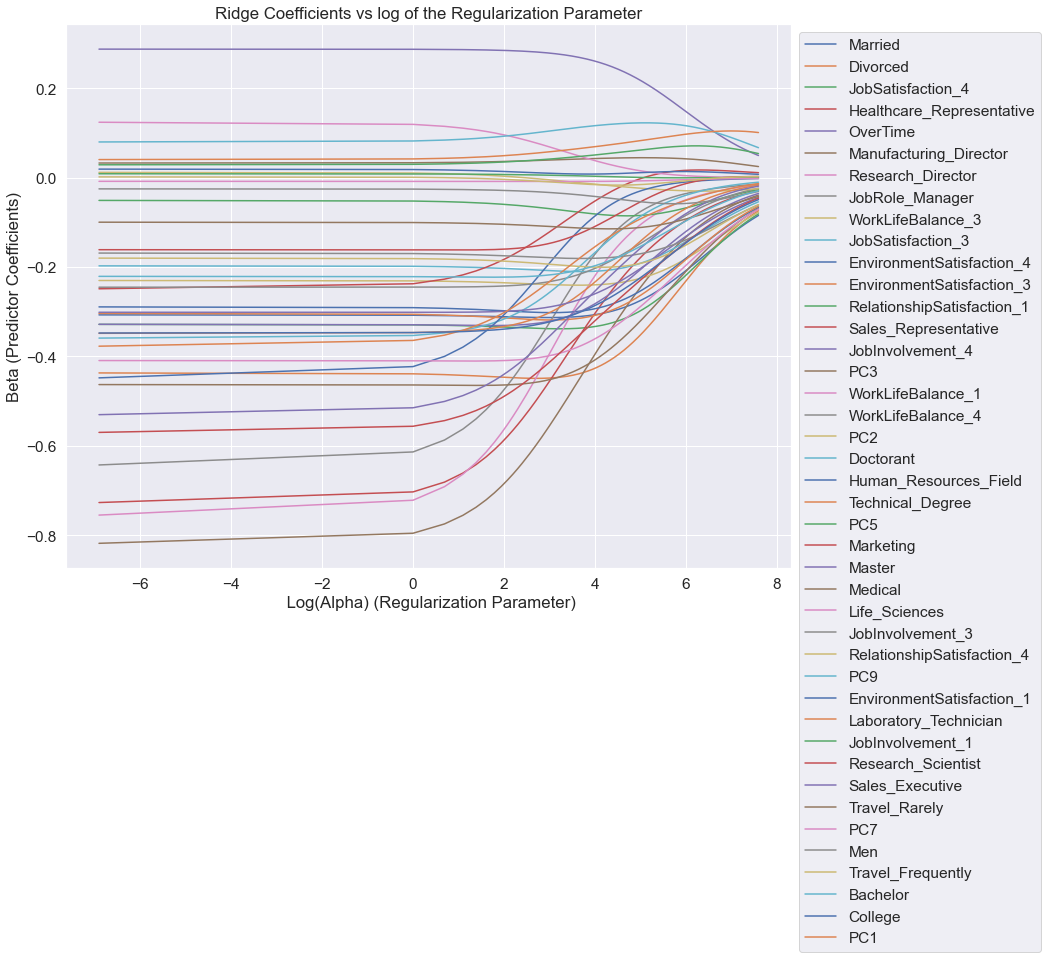

In [104]:
###Make plot of Beta as a function of Alpha
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.plot(log(alphas),coef)
ax.set_xlabel(' Log(Alpha) (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs log of the Regularization Parameter')
ax.axis('tight')
box =ax.get_position()
ax.set_position([box.x0,box.y0,box.width*0.65,box.height])
ax.legend(x_train_pc42[:0], bbox_to_anchor =(1, 1), loc = "upper left")
###ax.legend(loc='best')
fig.savefig('coef_vs_alpha.png')

> When lambda goes to infinity, all coefficients goes to 0. <br>Hence, we see that the Ridge regression does not select the "most accurate" variables (it does not shrink some coefficient to 0 even if the penalization is high) but it just "rebalance" the importance of each parameter in the model depending on how we consider that an additional variable should be penalized.

In [105]:
from pylab import *
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
ridgepoly = SGDClassifier(loss='log', penalty='l2')
searchridge=RandomizedSearchCV(estimator=ridgepoly,param_distributions={'alpha':arange(0.001, 10, 1)},scoring='accuracy',n_jobs=1,refit=True,cv=10, n_iter = 10, random_state = 0)
searchridge.fit(xp_train_pc42,Y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=SGDClassifier(loss='log'), n_jobs=1,
                   param_distributions={'alpha': array([1.000e-03, 1.001e+00, 2.001e+00, 3.001e+00, 4.001e+00, 5.001e+00,
       6.001e+00, 7.001e+00, 8.001e+00, 9.001e+00])},
                   random_state=0, scoring='accuracy')

In [106]:
print(searchridge.best_params_)
print(abs(searchridge.best_score_))

{'alpha': 0.001}
0.7774009126801006


In [142]:
ridgepoly = SGDClassifier(loss='log', penalty='l2', alpha = 0.001, random_state = 0)
rdgpoly = ridgepoly.fit(xp_train_pc42, Y_train)

In [108]:
y_predrig = ridgepoly.predict(xp_test_pc42)
print('Accuracy of Ridge logistic regression classifier on test set: {:.8f}'.format(ridgepoly.score(xp_test_pc42, Y_test)))

Accuracy of Ridge logistic regression classifier on test set: 0.78911565


<AxesSubplot:title={'center':'Confusion matrix for Ridge with logistic regression'}, xlabel='Predicted', ylabel='Actual'>

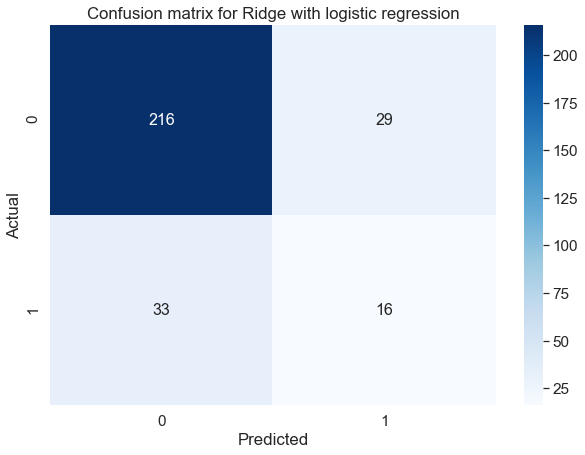

In [110]:
data = confusion_matrix(Y_test, y_predrig)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for Ridge with logistic regression')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})

<ipython-input-111-d71fcbf0a7a0>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


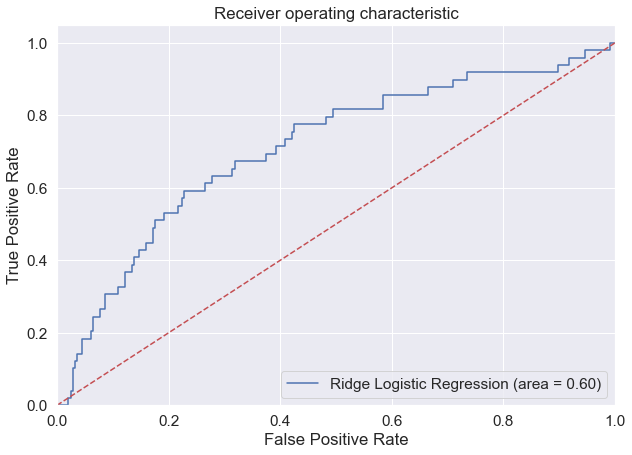

In [111]:
logit_roc_auc = roc_auc_score(Y_test, y_predrig)
fpr, tpr, thresholds = roc_curve(Y_test, ridgepoly.predict_proba(xp_test_pc42)[:,1])
plt.figure(figsize = (10,7))
plt.plot(fpr, tpr, label='Ridge Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [112]:
print(classification_report(Y_test, y_predrig))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       245
           1       0.36      0.33      0.34        49

    accuracy                           0.79       294
   macro avg       0.61      0.60      0.61       294
weighted avg       0.78      0.79      0.79       294



We obtain exactly the same classification than the basic logistic regression's ones.

In [158]:
polcol = df_poly.columns
pcol = np.reshape(polcol, (119, 1))
pcol = pcol.tolist()
pcol = pd.DataFrame(pcol, columns = ["Name"])
ridgepoly.coef_ = np.reshape(ridgepoly.coef_, (119,1))
coefridgepoly = pd.DataFrame(ridgepoly.coef_, columns = ["Coefficient"])
coefpoly = pd.concat([pcol, coefridgepoly], axis = 1)
coefpoly.set_index('Name')
coefpoly[coefpoly['Coefficient']!=0]

,Name,Coefficient
0,PC1,3.666815
1,PC2,2.412089
2,PC3,4.722618
3,PC5,-0.101711
4,PC7,3.413738
5,PC9,1.328702
6,PC1^2,-1.795106
7,PC1 PC2,-1.572396
8,PC1 PC3,2.906071
9,PC1 PC5,-2.656818


### B.4) Lasso Logistic Regression

> The **Least Absolute Shrinkage and Selection Operator (LASSO)** regression is quite similar to the Ridge regression, but it does not have the same penalty term : it is called the **L1 penalty term**. <br> Similar to ridge regression, an alpha value of zero spits out the basic OLS equation, however given a suitable alpha value lasso regression **can drive some coefficients to zero.**
> Moreover, it **minimizes the Sum of Square Residuals with a penalty** (without penalty it will keep all the variables). 
<br>
>****Warning*** : *performs very bad when variables are colinear.*

In [115]:
lassopoly = SGDClassifier(loss='log', penalty='l1')
searchlasso=RandomizedSearchCV(estimator=lassopoly,param_distributions={'l1_ratio':arange(0, 1, 0.001)},scoring='accuracy',n_jobs=1,refit=True,cv=10, n_iter = 15, random_state = 0)
searchlasso.fit(xp_train_pc42,Y_train.values.ravel())

RandomizedSearchCV(cv=10, estimator=SGDClassifier(loss='log', penalty='l1'),
                   n_iter=15, n_jobs=1,
                   param_distributions={'l1_ratio': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0....
       0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953,
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999])},
                   random_state=0, scoring='accuracy')

In [116]:
print(searchlasso.best_params_)
print(abs(searchlasso.best_score_))

{'l1_ratio': 0.859}
0.8538711993026714


In [138]:
lassopoly = SGDClassifier(loss='log', penalty='l1', l1_ratio=0.859, random_state = 0)
lspoly = lassopoly.fit(xp_train_pc42, Y_train)

In [156]:
y_predlas = lspoly.predict(xp_test_pc42)
print('Accuracy of logistic regression classifier on test set: {:.8f}'.format(lspoly.score(xp_test_pc42, Y_test)))

Accuracy of logistic regression classifier on test set: 0.78571429


In [118]:
polcol = df_poly.columns
pcol = np.reshape(polcol, (119, 1))
pcol = pcol.tolist()
pcol = pd.DataFrame(pcol, columns = ["Name"])

In [159]:
lassopoly.coef_ = np.reshape(lassopoly.coef_, (119,1))
coeflassopoly = pd.DataFrame(lassopoly.coef_, columns = ["Coefficient"])
coefpoly = pd.concat([pcol, coeflassopoly], axis = 1)
coefpoly.set_index('Name')
coefpoly[coefpoly['Coefficient']!=0]

,Name,Coefficient
0,PC1,301.273271
1,PC2,63.394970
2,PC3,246.140401
3,PC5,43.192343
4,PC7,148.775505
5,PC9,57.922630
6,PC1^2,8.092191
7,PC1 PC2,-8.784999
8,PC1 PC3,16.281374
9,PC1 PC5,-60.660783


According to Lasso logistic regression, the most important features are the 113 contained in this dataframe. Moreover, this model is interesting because it is accurate and uses less information than the basic logistic regression.

<AxesSubplot:title={'center':'Confusion matrix for lasso with logistic regression'}, xlabel='Predicted', ylabel='Actual'>

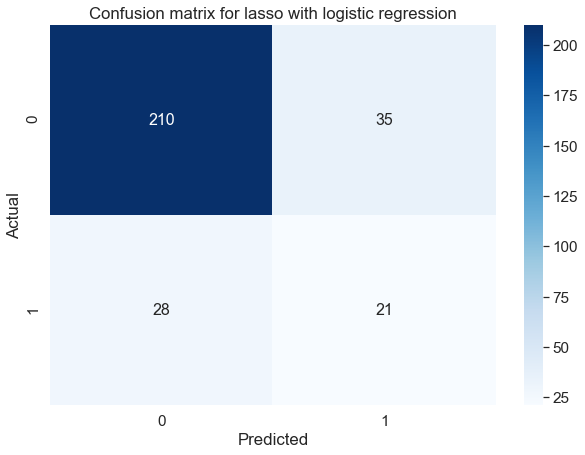

In [124]:
data = confusion_matrix(Y_test, y_predlas)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for lasso with logistic regression')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})

<ipython-input-125-73df7ab57bb9>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


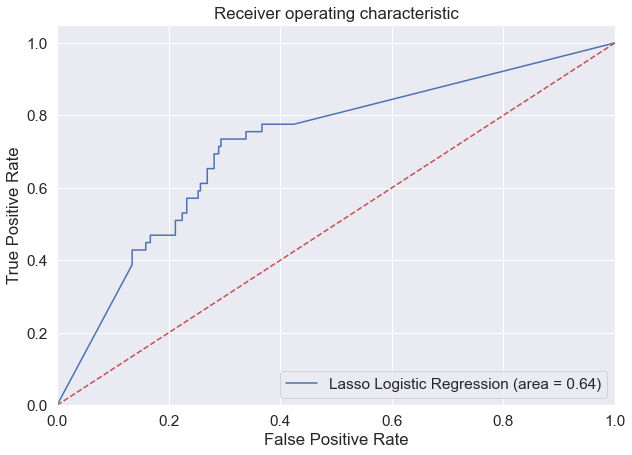

In [125]:
logit_roc_auc = roc_auc_score(Y_test, y_predlas)
fpr, tpr, thresholds = roc_curve(Y_test, lspoly.predict_proba(xp_test_pc42)[:,1])
plt.figure(figsize = (10,7))
plt.plot(fpr, tpr, label='Lasso Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [126]:
print(classification_report(Y_test, y_predlas))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       245
           1       0.38      0.43      0.40        49

    accuracy                           0.79       294
   macro avg       0.63      0.64      0.63       294
weighted avg       0.80      0.79      0.79       294



The Lasso models classifies a little bit better 1 labels but a little bit less 0 lables.

### B.5) Elastic Net with a logistic regression 

> Elastic net allows us to **set and choose an alpha value**, and to tune the alpha parameter where **alpha = 0** corresponds to **ridge** and **alpha = 1** to **lasso**. 
- If alpha = 0: the penalty function reduces to the L1 (ridge) term 
- If alpha=1: L2 (lasso) term. T
Therefore we can ***choose an alpha value between 0 and 1 to optimize the elastic net***. Effectively this will shrink some coefficients and set some to 0 for sparse selection.

> The elastic net can be a ***naive*** elastic net if there is a double shrinkage effect. It is avoided by multiplying the expression by (1 + lambda2/T).

> There are two steps in the process of elastic net : 
- The "lasso part" (L1 term) select variables
- The "ridge part" (L2 term) improves the prediction by stabilizing the way that highly correlated variables are used.

> This method is a perfect **trade-off** between the Lasso and the ridge regression : we merge the efficiency of Lasso in selecting accurate variables and the stabilizing nature of Ridge regression.

> Elastic net solves the problem of Lasso : no more issues with groups of highly correlated variable and the number of selected variables admits an upper bound theoretically equal to T.

> When N > T, elastic net can select more than T variables.

In [127]:
elastic = SGDClassifier(loss='log', penalty='elasticnet')
search=RandomizedSearchCV(estimator=elastic,param_distributions={'alpha':arange(0.001, 10, 1),'l1_ratio':arange(0, 1, 0.001)},scoring='accuracy',n_jobs=1,refit=True,cv=10, n_iter = 25, random_state = 0)
search.fit(xp_train_pc42,Y_train.values.ravel())

RandomizedSearchCV(cv=10,
                   estimator=SGDClassifier(loss='log', penalty='elasticnet'),
                   n_iter=25, n_jobs=1,
                   param_distributions={'alpha': array([1.000e-03, 1.001e+00, 2.001e+00, 3.001e+00, 4.001e+00, 5.001e+00,
       6.001e+00, 7.001e+00, 8.001e+00, 9.001e+00]),
                                        'l1_ratio': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0...
       0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953,
       0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962,
       0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971,
       0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 ,
       0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989,
       0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998,
       0.999])},
                   random_state=0, scoring='accuracy')

In [128]:
print(search.best_params_)
print(abs(search.best_score_))

{'l1_ratio': 0.537, 'alpha': 0.001}
0.8447469620058452


In [153]:
ENpoly = SGDClassifier(loss='log', penalty='elasticnet', alpha=0.001, l1_ratio=0.537)
enpoly = ENpoly.fit(xp_train_pc42, Y_train)

In [149]:
y_preden = ENpoly.predict(xp_test_pc42)
print('Accuracy of logistic regression classifier on test set: {:.8f}'.format(ENpoly.score(xp_test_pc42, Y_test)))

Accuracy of logistic regression classifier on test set: 0.75850340


In [150]:
ENpoly.coef_ = np.reshape(ENpoly.coef_, (119,1))
coefENpoly = pd.DataFrame(ENpoly.coef_, columns = ["Coefficient"])
coefENpoly = pd.concat([pcol, coefENpoly], axis = 1)
coefENpoly.set_index('Name')
coefENpoly[coefENpoly['Coefficient']!=0]

,Name,Coefficient
0,PC1,7.804563
1,PC2,2.072445
2,PC3,7.882304
3,PC5,1.373083
4,PC7,5.431650
5,PC9,0.093902
8,PC1 PC3,0.466435
9,PC1 PC5,-1.859365
10,PC1 PC7,-2.081748
14,PC2 PC5,2.720386


> Elastic Net selects less variables but gets the smallest out-sample accuracy.

<AxesSubplot:title={'center':'Confusion matrix for Neural Network'}, xlabel='Predicted', ylabel='Actual'>

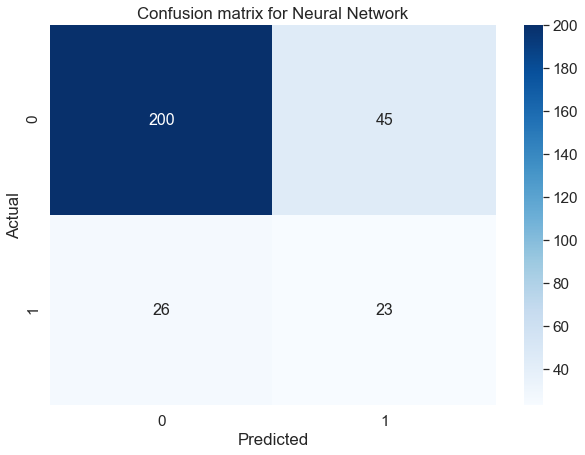

In [151]:
data = confusion_matrix(Y_test, y_preden)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for Elastic Net with logistic regression')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})

<ipython-input-154-7431b5a73483>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


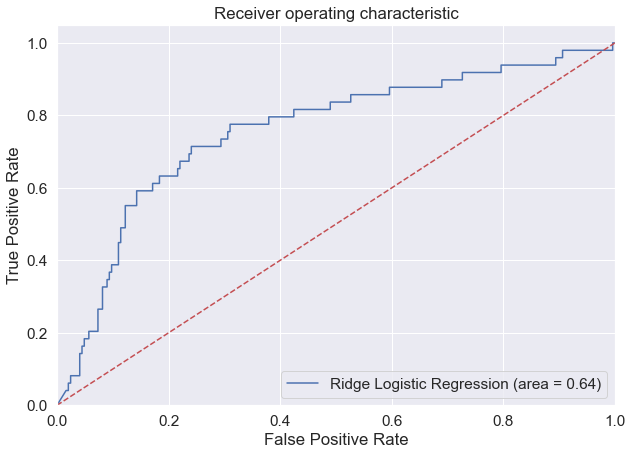

In [154]:
logit_roc_auc = roc_auc_score(Y_test, y_preden)
fpr, tpr, thresholds = roc_curve(Y_test, ENpoly.predict_proba(xp_test_pc42)[:,1])
plt.figure(figsize = (10,7))
plt.plot(fpr, tpr, label='Elastic Net Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [155]:
print(classification_report(Y_test, y_preden))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       245
           1       0.34      0.47      0.39        49

    accuracy                           0.76       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.79      0.76      0.77       294



The elastic net model predicts less precisely 0 labels than basic and ridge models, and less precisely 1 labels than all others models.

In [148]:
print('Accuracy of basic logistic regression classifier on test set: {:.8f}'.format(logpoly.score(xp_test_pc42, Y_test)))
print('Accuracy of ridge logistic regression classifier on test set: {:.8f}'.format(ridgepoly.score(xp_test_pc42, Y_test)))
print('Accuracy of lasso logistic regression classifier on test set: {:.8f}'.format(lspoly.score(xp_test_pc42, Y_test)))
print('Accuracy of elastic net logistic regression classifier on test set: {:.8f}'.format(enpoly.score(xp_test_pc42, Y_test)))

Accuracy of basic logistic regression classifier on test set: 0.81632653
Accuracy of ridge logistic regression classifier on test set: 0.78911565
Accuracy of lasso logistic regression classifier on test set: 0.78571429
Accuracy of elastic net logistic regression classifier on test set: 0.75850340


Comparing our 5 models, we can observe that :
- the basic logistic regression and ridge have the same out-sample accuracy, but both of does not reduce the information.
- the lasso regression is the most accurate and selects 114 variables over 119 variables.
- the Elastic Net logistic regression is the less accurate model out of sample, but it selected less variables : 94.

**Conclusion** : the fact that the basic logistic regression get the best out-sample accuracy could mean that all the features we have created are important for our analysis, and do not lead to overfitting.

##   Conclusion on econometrics.

### **Advantages and limits of the different methods:**

**PCA**: 
- It is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible. It allows us to **remove correlated features** (*improves algorithm performance and reduce overfitting*) and **improves visualization** of the data in high dimension.
- But Principal Components are **not as readable** and interpretable as original features, the data must be **standardize** and we need to **select PC** with care in order to don't loose information. 

**BSS**:
- It makes **all possible model** so we are sure to pick the best choice. 
- But it's **extremely long** to run/execute the algorithm due to the advantage above. 

**FSS**:
- Much **quicker** than BSS
- But can **fail** because of the variables that are stuck in each model.

**Ridge**:
- Improves the prediction by **stabilizing** the way that highly correlated variables are used.
- But do not select variables, only a **shrinkage effect**. 

**Lasso**:
- Efficiency in **selecting accurate variables**
- But performs very bad when variables are **colinear**. 

**Elastic Net**:
- Trade off between Ridge and Lasso (**selection** + **no more issue of highly correlated variable**). 
- One disadvantage is the **computational cost**.

# 4) Predictive methods. 

## 4.1) Logistic regression from scratch - gradient descent

> Gradient descent is used to find the value of parameters that **minimizes the cost function J**. <br> We will apply this method in the case of **logistic regression**.

***Some useful libraries***

In [41]:
import numpy as np
from scipy.optimize import minimize # optimization
import matplotlib.pyplot as plt # plot graphics
import timeit # check runtime

***Use matrix and vector notations***

We will use the vectorization method, because it's more efficient in terms of running time. 

In [42]:
m_train = x_train_scaled.shape[0] #Size of the training set: 1976
m_test = x_test.shape[0] #Size of the test set: 294

n_train = x_train_scaled.shape[1] #52 features in the training set
n_test = x_test_scaled.shape[1] # 52 features in the test set

print("Size of the training set:", m_train, "\n Size of the test set:", 294, "\n Number of features", n_train)

Size of the training set: 1976 
 Size of the test set: 294 
 Number of features 52


***Create a prediction function for the logistic regression***

In [43]:
def prediction_function(theta,x):
    h=1/(1+np.exp(-np.matmul(x,theta)))
    return(h.flatten())

***Create the cost function for the logistic regression***

In [44]:
def cost_function_vec(theta,x,y): # logistic function h_theta(x)
    J = 0
    h = prediction_function(theta,x)
    J -= np.matmul(y.transpose(),np.log(h)) + np.matmul((1-y).transpose(), np.log(1-h))
    return(J.item())

***Create the gradient descent***

In [45]:
def gradient_vec(theta, x, y):
    return(np.matmul(x.transpose(),prediction_function(theta, x) - y))

***Check runtime (cost function)***

In [46]:
#Initialization of the vector of parameters.
theta= np.random.multivariate_normal(np.zeros((n_train)),np.eye((n_train))).reshape((n_train,1))

In [47]:
start = timeit.default_timer() # start timer
f = cost_function_vec(theta,x_train_scaled,Y_train) # compute the cost
stop = timeit.default_timer() # stop timer
print(f)
print('Time: {:.5f}'.format(stop - start))

5782.502893383248
Time: 0.01168


This cheking time is useful to show that vectorization takes less time than stochastic gradient descent (will do it later).

***Implement the batch gradient descent***

In [48]:
def batch_gradient_descent_vec(x, y, alpha=0.1, maxiter = 2000, tol = 0.0001):
    n = n_train
    theta = np.zeros(n)
    it = 0
    fun_value = cost_function_vec(theta, x, y)
    print("Batch gradient descent...")
    while it < maxiter:
        old = fun_value
        theta = theta + alpha * (x.transpose() @ (y-prediction_function(theta,x)))
        fun_value = cost_function_vec(theta, x, y)
        print(fun_value)
        diff = np.abs(old-fun_value)
        it += 1
        if np.abs(diff) < tol:
            break
        return(theta)
    
res = batch_gradient_descent_vec(x_train_scaled, Y_train)

Batch gradient descent...
nan


C:\Users\Elisa SEBASTIAN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [50]:
res

Age                          -27.763974
DailyRate                    -11.244377
DistanceFromHome               7.587884
Men                           -5.050000
HourlyRate                    -1.386473
MonthlyIncome                -24.103876
MonthlyRate                    5.661794
NumCompaniesWorked             2.273878
OverTime                       5.550000
PercentSalaryHike             -7.735025
TotalWorkingYears            -28.015599
TrainingTimesLastYear         -8.104521
YearsAtCompany               -20.561711
YearsInCurrentRole           -24.054639
YearsSinceLastPromotion       -6.779010
YearsWithCurrManager         -21.960806
Travel_Frequently             -0.100000
Travel_Rarely                 -8.500000
Healthcare_Representative     -3.950000
Laboratory_Technician         -0.550000
JobRole_Manager               -3.600000
Manufacturing_Director        -5.250000
Research_Director             -3.050000
Research_Scientist            -5.300000
Sales_Executive               -4.000000


***Compute metrics***

In [51]:
#Missclassification error rate
err = np.mean(np.abs(prediction_function(res, x_test_scaled)- Y_test))
err

0.28047247993695995

In [52]:
Y_prob=np.abs(prediction_function(res, x_test_scaled))
Y_prob=pd.DataFrame(Y_prob)
Y_pred_gradient=[]
for i in range(294):
    if Y_prob.iloc[i,0] > 0.5:
        Y_pred_gradient.append(1)
    else:
        Y_pred_gradient.append(0)

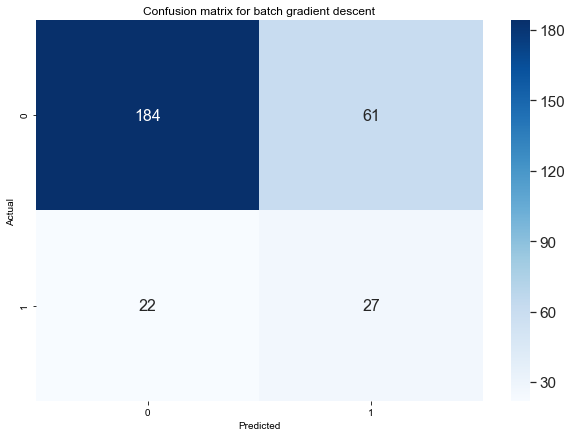

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
data = confusion_matrix(Y_test, Y_pred_gradient)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for batch gradient descent')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})# font size

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_gradient))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       245
           1       0.31      0.55      0.39        49

    accuracy                           0.72       294
   macro avg       0.60      0.65      0.61       294
weighted avg       0.80      0.72      0.75       294



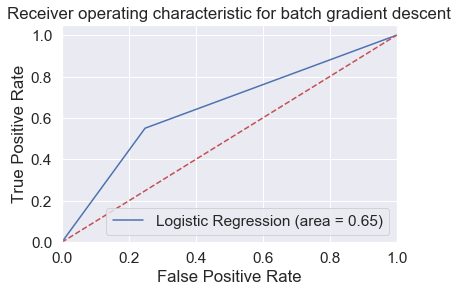

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_gradient = roc_auc_score(Y_test, Y_pred_gradient)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_gradient)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_gradient)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for batch gradient descent')
plt.legend(loc="lower right")
plt.show()

## 4.2) Tree-based methods for classification. 

> The tree-based methods consist in assigning to each region Rj the most commonly occuring class of observations. 

### 4.2.1) Simple classification tree

In [56]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
simple_tree = DecisionTreeClassifier(random_state=1)
# Train Decision Tree Classifer
simple_tree = simple_tree.fit(X_train_scaled,Y_train)
#Predict the response for test dataset
y_pred = simple_tree.predict(X_test_scaled)

In [58]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7346938775510204


***Visualization***

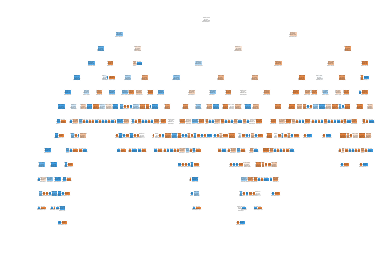

In [59]:
plot_tree(simple_tree, filled=True)
plt.show()

> "Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning."

***Optimizing Decision Tree Performance***

> The classification rate (in a given region): proportion of training observations that do not belong to the most common class. 
> We will here use the Gini index and cross-entropy:
- **Gini index**: measure of total variance across the 2 classes. Small values indicate that a node contains a predominant class. This is the default criteria in the code below ad above.
- **Cross-entropy**: this is also a measure of purity (small value -> the node is pure). 

>**Gini Index**

In [60]:
acc=[]

for i in range(1,62):
    gini_tree = DecisionTreeClassifier(max_depth=i, random_state=1)
    gini_tree=gini_tree.fit(X_train_scaled,Y_train)
    y_pred_gini = gini_tree.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(Y_test, y_pred_gini))

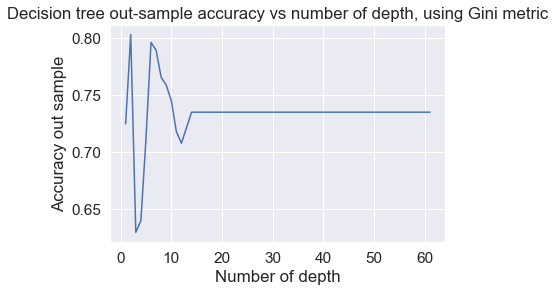

In [61]:
Nb_depth=range(1,62)

plt.plot(Nb_depth,acc)
plt.title('Decision tree out-sample accuracy vs number of depth, using Gini metric')
plt.xlabel('Number of depth')
plt.ylabel('Accuracy out sample')
plt.show()

In [62]:
print("The maximum out-sample accuracy is",max(acc), "with", acc.index(max(acc))+1, "depths." )

The maximum out-sample accuracy is 0.8027210884353742 with 2 depths.


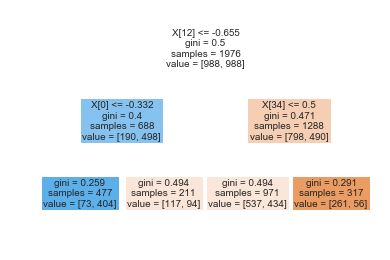

In [63]:
gini_tree_max = DecisionTreeClassifier(max_depth=2, random_state=1)
gini_tree_max=gini_tree_max.fit(X_train_scaled,Y_train)
plot_tree(gini_tree_max, filled=True)
plt.show()

> **entropy**

In [64]:
# Create Decision Tree classifer object
acc=[]

for i in range(1,62):
    entropy_tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=1)
    entropy_tree=entropy_tree.fit(X_train_scaled,Y_train)
    y_pred = entropy_tree.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(Y_test, y_pred))


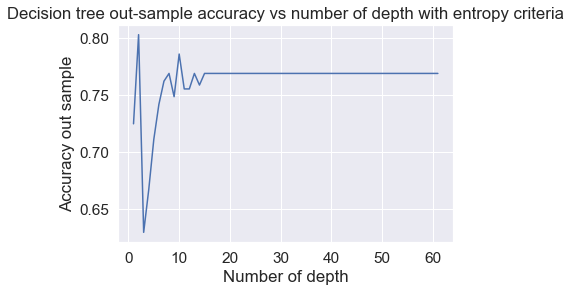

In [65]:
Nb_depth=range(1,62)

plt.plot(Nb_depth,acc)
plt.title('Decision tree out-sample accuracy vs number of depth with entropy criteria')
plt.xlabel('Number of depth')
plt.ylabel('Accuracy out sample')
plt.show()

In [66]:
print("The maximum out-sample accuracy is",max(acc), "with", acc.index(max(acc))+1, "depths." )

The maximum out-sample accuracy is 0.8027210884353742 with 2 depths.


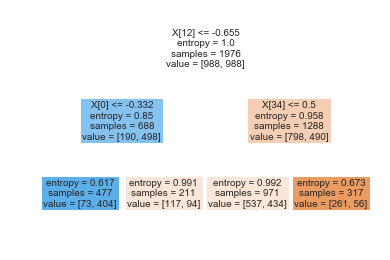

In [67]:
entropy_tree_max = DecisionTreeClassifier(criterion="entropy", max_depth=2, random_state=1)
entropy_tree_max=entropy_tree_max.fit(X_train_scaled,Y_train)
plot_tree(entropy_tree_max, filled=True)
plt.show()
y_pred = entropy_tree_max.predict(X_test_scaled)

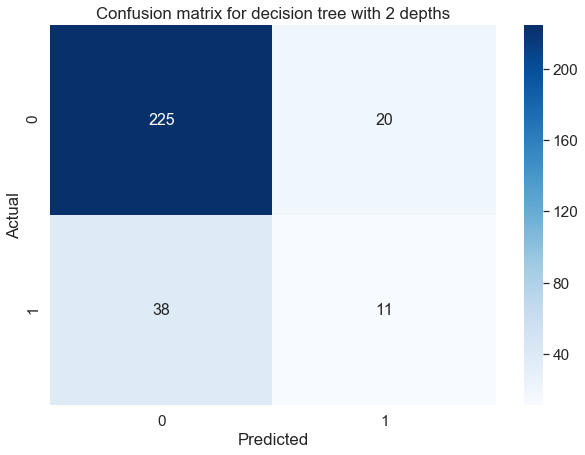

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
data = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for decision tree with 2 depths')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})# font size

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       245
           1       0.35      0.22      0.27        49

    accuracy                           0.80       294
   macro avg       0.61      0.57      0.58       294
weighted avg       0.77      0.80      0.78       294



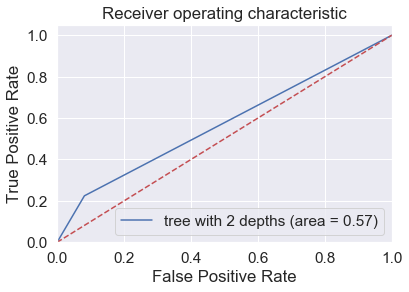

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_tree = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='tree with 2 depths (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

> The max accuracy that we can have is in most of the case with **2 depths** (below or above the accuracy decreases).<br> A higher value of maximum depth causes overfitting, and a lower value causes underfitting.

**Conclusion**:<br>
The best model is the one with 2 depths. <br>
**Advantages**: easy and interpretable. <br>
**Limits**: not the best in terms of prediction accuracy and unstable trees. 

### 4.2.2) Bagging (Bootsrap aggregating)

> Bagging is use to **reduce the variance** of machine learning methods. <br>
The idea is to use several samples (**boostrap**) in the training set and average their prediction (or **take the majority**). 

> Let's do an example of bagging with **100 trees** based in the criteria of **entropy**.

In [73]:
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier(criterion="entropy")

bag_model_100=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True, random_state=1)

bag_model_100=bag_model_100.fit(X_train_scaled,Y_train)

Y_pred=bag_model_100.predict(X_test_scaled)

print(bag_model_100.score(X_test_scaled, Y_test))

0.8367346938775511


We can see that the accuracy out sample with bagging method is better than the one with a simple classification tree due to the reduction of the variance. 

***Choose the number of trees in order to maximize the accuracy out sample***

> **!Warning!**: this piece of code takes a very long time to run (500 bagging algorithm) but I have saved the images bagging_accuracy which will be in the report.

In [133]:
Accuracy=[]

for i in range(1,500):
    bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=i, bootstrap=True, random_state=1)
    bag_model=bag_model.fit(X_train_scaled,Y_train)
    Accuracy.append(bag_model.score(X_test_scaled, Y_test))
    

In [141]:
max(Accuracy)

0.8435374149659864

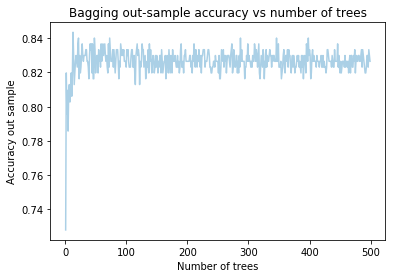

<Figure size 432x288 with 0 Axes>

In [137]:
Nb_trees=range(1,500)

plt.plot(Nb_trees,Accuracy)
plt.title('Bagging out-sample accuracy vs number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy out sample')
plt.show()

plt.savefig('bagging_accuracy.png')

In [144]:
print("The maximum out-sample accuracy is",max(Accuracy), "with", Accuracy.index(max(Accuracy))+1, "trees." )

The maximum out-sample accuracy is 0.8435374149659864 with 13 trees.


> In any case, we can see that using more than 30 trees isn't improving the accuracy at all. 

In [74]:
from sklearn.ensemble import BaggingClassifier 
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=13, bootstrap=True, random_state=1)
bag_model=bag_model.fit(X_train_scaled,Y_train)
y_pred=bag_model.predict(X_test_scaled)

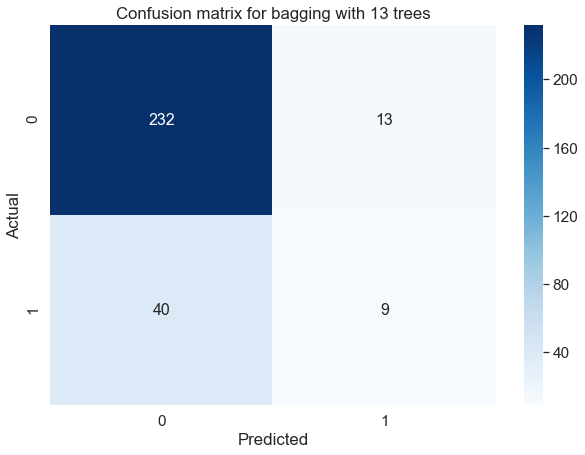

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
data = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for bagging with 13 trees')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})# font size

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       245
           1       0.41      0.18      0.25        49

    accuracy                           0.82       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.78      0.82      0.79       294



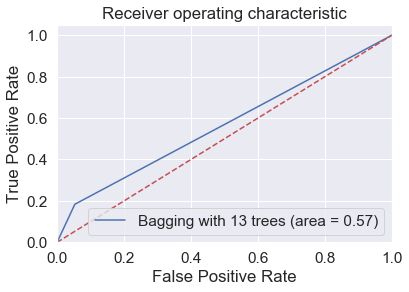

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_bagging = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Bagging with 13 trees (area = %0.2f)' % roc_auc_bagging)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

***Bagging classifier using k folds=10 to evaluate the model***

In [78]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
  
kfold = model_selection.KFold(n_splits = 10) 

  
results = model_selection.cross_val_score(bag_model, X_train_scaled, Y_train, cv = kfold) 
print("accuracy :") 
print(results.mean()) 

accuracy :
0.9201815105368405


> With no surprise, the accuracy using folds is higher than the accuracy using the test set. 

### 4.2.3) Random Forest 

> It corresponds to the **bagging method** seen above but with **decorrelated trees** by choosing a **random sample of predictors** at each split of the tree. <br> Typically, we choose the number of predictor p= n^(1/2). 

In [79]:
p=np.sqrt(n_train)
p

7.211102550927978

In [85]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
forest_13=RandomForestClassifier(n_estimators=13, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
forest_13.fit(X_train_scaled,Y_train)

y_pred=forest_13.predict(X_test_scaled)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8333333333333334


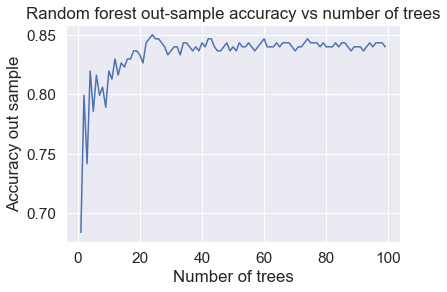

The maximum out-sample accuracy is 0.8503401360544217 with 24 trees.


In [109]:
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,100):
    forest_choice=RandomForestClassifier(n_estimators=i, random_state=3)
    forest_choice=forest_choice.fit(X_train_scaled,Y_train)
    y_pred=forest_choice.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(Y_test, y_pred))

Nb_trees=range(1,100)

plt.plot(Nb_trees,acc)
plt.title('Random forest out-sample accuracy vs number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy out sample')
plt.show()

print("The maximum out-sample accuracy is",max(acc), "with", acc.index(max(acc))+1, "trees." )

We can show the **relative contribution of each feature** in the prediction. <br> The code below  automatically computes the relevance score of each feature in the **training phase**. <br> Then it scales the relevance down so that the **sum of all scores is 1**.<br> More in detail, we use the criteria of **gini** importance also known as the total decrease in node impurity: "*how much the model fit or accuracy decreases when you drop a variable*".<br> The larger the decrease, the more significant the variable is.

In [133]:
forest_24=RandomForestClassifier(n_estimators=24)
forest_24=forest_24.fit(X_train_scaled,Y_train)

In [134]:
feature_imp = pd.Series(forest_24.feature_importances_,index=X_train_scaled.columns).sort_values(ascending=False)
feature_imp

MonthlyIncome                 0.059057
YearsAtCompany                0.054829
Age                           0.053985
TotalWorkingYears             0.051256
YearsWithCurrManager          0.044467
YearsInCurrentRole            0.038376
YearsSinceLastPromotion       0.034488
DistanceFromHome              0.031713
Married                       0.031137
DailyRate                     0.030520
NumCompaniesWorked            0.030388
HourlyRate                    0.029190
MonthlyRate                   0.027713
PercentSalaryHike             0.027561
TrainingTimesLastYear         0.025938
JobSatisfaction_4             0.025748
WorkLifeBalance_3             0.025516
Life_Sciences                 0.023274
Divorced                      0.021958
EnvironmentSatisfaction_3     0.019902
Medical                       0.019023
EnvironmentSatisfaction_4     0.018643
EnvironmentSatisfaction_2     0.015108
RelationshipSatisfaction_4    0.014703
WorkLifeBalance_2             0.014349
Non_Travel               

No handles with labels found to put in legend.


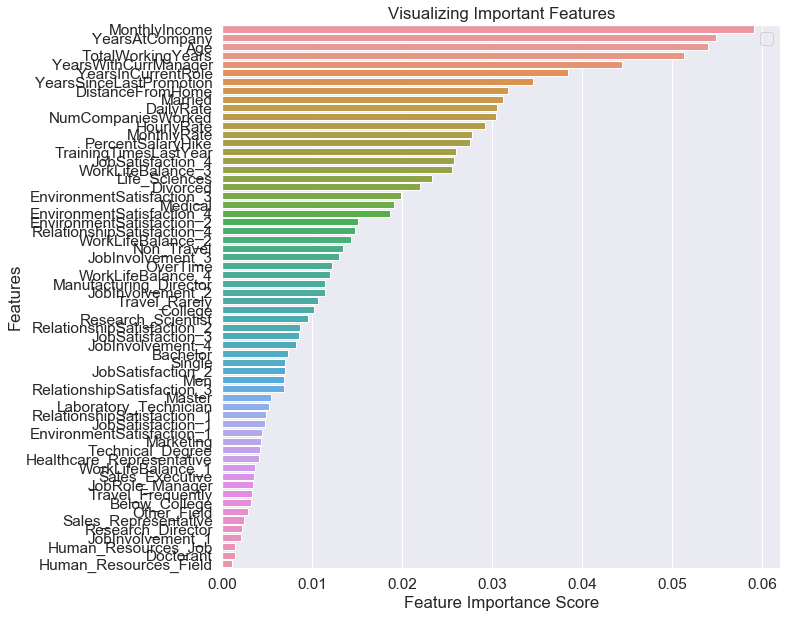

In [135]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

***Generating the Model on Selected Features***

In [136]:
select_X_train_scaled=X_train_scaled.drop(['Doctorant','JobInvolvement_1','Human_Resources_Field','Human_Resources_Job','Sales_Representative','Marketing','WorkLifeBalance_1','Healthcare_Representative','JobRole_Manager','Travel_Frequently','Other_Field','Below_College','Laboratory_Technician','Sales_Executive','WorkLifeBalance_4','Research_Director','Master','Technical_Degree','RelationshipSatisfaction_1','JobSatisfaction_1','JobInvolvement_4','College','Men','EnvironmentSatisfaction_1','Manufacturing_Director','Research_Scientist'], axis=1)
select_X_test_scaled=X_test_scaled.drop(['Doctorant','JobInvolvement_1','Human_Resources_Field','Human_Resources_Job','Sales_Representative','Marketing','WorkLifeBalance_1','Healthcare_Representative','JobRole_Manager','Travel_Frequently','Other_Field','Below_College','Laboratory_Technician','Sales_Executive','WorkLifeBalance_4','Research_Director','Master','Technical_Degree','RelationshipSatisfaction_1','JobSatisfaction_1','JobInvolvement_4','College','Men','EnvironmentSatisfaction_1','Manufacturing_Director','Research_Scientist'], axis=1)

In [142]:
forest_24_select=RandomForestClassifier(n_estimators=24, random_state=5)
forest_24_select.fit(select_X_train_scaled,Y_train)

y_pred=forest_24_select.predict(select_X_test_scaled)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8537414965986394


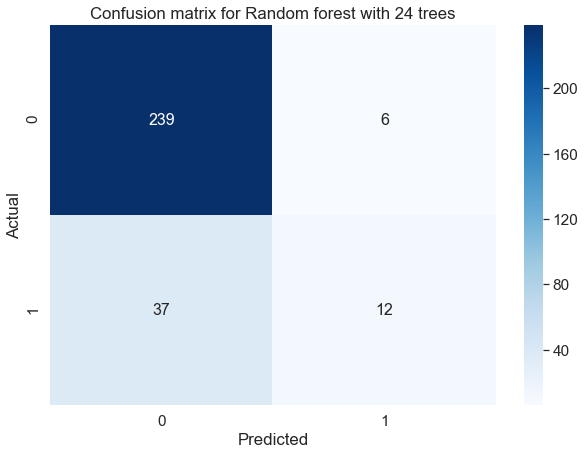

In [143]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
data = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for Random forest with 24 trees')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})# font size

In [144]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.67      0.24      0.36        49

    accuracy                           0.85       294
   macro avg       0.77      0.61      0.64       294
weighted avg       0.83      0.85      0.82       294



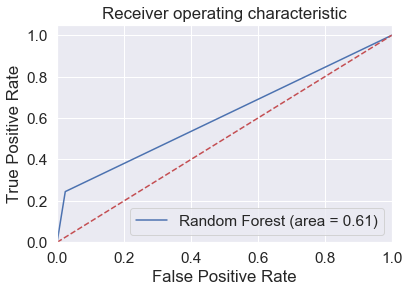

In [145]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_forest = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

> We see that after **removing the least important features** (Doctorant, JobInvolvment_1, etc.), the **accuracy increased** (sometimes is **the same** because if we re-run the code, accuracy changes). This is because it removes misleading data and noise, resulting in an increased accuracy. (A lesser amount of features also reduces the training time.)

## 4.3) Neural networks

### 4.3.1) Introduction

The basic idea behind a neural network is to simulate lots of densely interconnected brain cells inside a computer so you can get it to learn things, recognize patterns, and make decisions in a humanlike way. The amazing thing about a neural network is that we don't have to program it to learn explicitly: it learns all by itself, just like a brain.


> In neural networks, we consider a more complex and **non-linear prediction
function**. 
<br> ***Note***: if we choose the **sigmoid** activation function with a **single neuron**, the neural network corresponds to the simple **logistic regression**.

### 4.3.2) Data preparation.

Steps of the data preparation as: 
- dealing with qualitatives variables (OneHotEncoder)
- scaling variables
- dealing with unbalanced data (SMOTE) 

have been already done. 

So, we are using: 
- df2
- X_train_scaled
- X_test_scaled
- Y_train
- Y_test

### 4.3.3) Building our model 

In [39]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import KFold
import tensorflow

Using TensorFlow backend.


### 4.3.4) Selection of optimal parameters for the Neural Network 

We wanted to use a very powerful optimization algorithm which will allows us to select optimal parameters for our Neural Network. We will use **Grid Search Algorithm.**

Unfortunately, we couldn't get it work, so we selected parameters 'trial-and-error' method. 

We ended up with: 
- dropout = 0.1
- epochs = 100
- batch_size = 30
- optimizer = 'adam'



In [40]:
dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'

In [41]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracy = cross_val_score(estimator = classifier, X = X_train_scaled, y = Y_train, cv = 30)
max = accuracy.max()

In [42]:
print("Best accuracy: ", max)

Best accuracy:  1.0


In [43]:
y_pred = classifier.fit(X_test_scaled, Y_test)

In [44]:
y_pred = classifier.predict(X_test_scaled)

In [45]:
predicted_class_indices=np.argmax(y_pred,axis=1)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9455782312925171

<AxesSubplot:title={'center':'Confusion matrix for Neural Network'}, xlabel='Predicted', ylabel='Actual'>

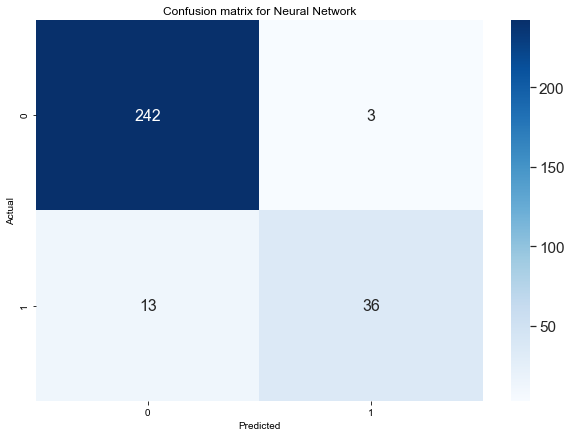

In [48]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
data = confusion_matrix(Y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for Neural Network')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", fmt = ".0f",annot=True,annot_kws={"size": 16})# font size

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       245
           1       0.92      0.73      0.82        49

    accuracy                           0.95       294
   macro avg       0.94      0.86      0.89       294
weighted avg       0.94      0.95      0.94       294



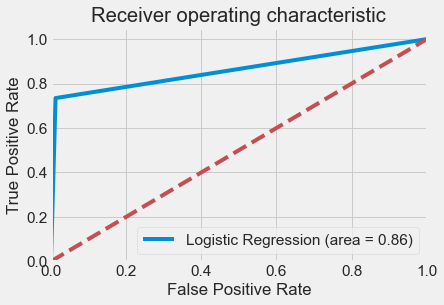

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.style.use("fivethirtyeight")
NN_roc_auc = roc_auc_score(Y_test, y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % NN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## 4.4) K-means

***K-means based on a distance matrix***

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

By elbow method and Silhouette coefficient we ahev decided to do 5 clusters. 

***Choose the number of cluster***

In [53]:
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

#Making a copy of the X_train
X_train_scaled1 = X_train_scaled. copy() 

#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_scaled1)
labels = kmeans.labels_

clmns = X_train_scaled.columns
clmns = pd.Index.tolist(clmns)

#Glue back to originaal data
X_train_scaled1['clusters'] = labels

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 42}

# A list holds the SSE values for each k
sse = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled1)
    sse.append(kmeans.inertia_)

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. In this example, the elbow is located at x=5

<Figure size 432x288 with 0 Axes>

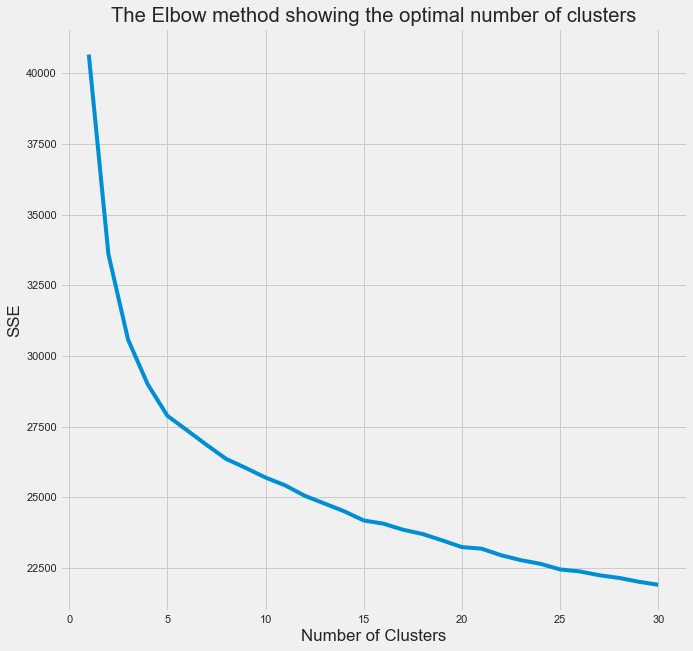

In [54]:
fig = plt.figure()
plt.style.use("fivethirtyeight")
plt. figure(figsize = (10, 10))

plt.plot(range(1, 31), sse)

plt.title('The Elbow method showing the optimal number of clusters')
plt.xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically.

In [59]:
#pip install kneed
from kneed import KneeLocator
kl = KneeLocator(range(1,31), sse, curve="convex", direction="decreasing")
kl.elbow

5

**The silhouette coefficient is a measure of cluster cohesion and separation.** It quantifies how well a data point fits into its assigned cluster based on two factors:

- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient

In [60]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that the best choice for k is 4-5 since it has the maximum score

<Figure size 432x288 with 0 Axes>

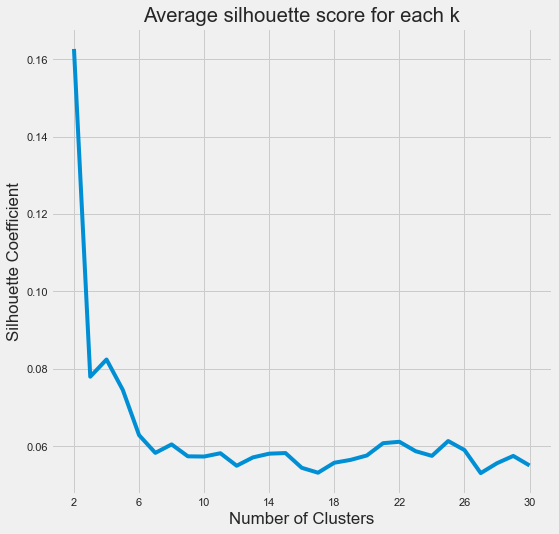

In [61]:
fig = plt.figure()
plt.style.use("fivethirtyeight")
plt. figure(figsize = (8, 8))

plt.plot(range(2, 31), silhouette_coefficients)
plt.xticks(np.arange(2, 31, 4))
plt.title("Average silhouette score for each k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [62]:
#Making a copy of the X_train
X_train_scaled1 = X_train_scaled. copy() 

#Cluster the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train_scaled1)
labels = kmeans.labels_

clmns = X_train_scaled.columns
clmns = pd.Index.tolist(clmns)

#Glue back to originaal data
X_train_scaled1['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print(X_train_scaled1[clmns].groupby(['clusters']).mean())

               Age  DailyRate  DistanceFromHome       Men  HourlyRate  \
clusters                                                                
0         0.944866  -0.268625         -0.229739  0.486111   -0.060833   
1        -0.166647  -0.114255          0.164709  0.517937   -0.132877   
2         0.006472  -0.006990          0.066889  0.585409    0.042697   
3         1.261808   0.301143          0.072143  0.596154    0.029685   
4        -1.037158  -0.184894         -0.011754  0.535928   -0.088824   

          MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
clusters                                                             
0              1.544511     0.052195            0.148490  0.194444   
1             -0.105589    -0.143693           -0.416589  0.286996   
2             -0.397170     0.085168            0.889572  0.322064   
3              1.307204     0.161462            0.881543  0.275641   
4             -0.770821     0.072996           -0.677092  0.279940  

/Applications/anaconda3/envs/KERAS/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Applications/anaconda3/envs/KERAS/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(15.820488425925923, 0.5, 'MonthlyIncome')

<Figure size 1440x1440 with 0 Axes>

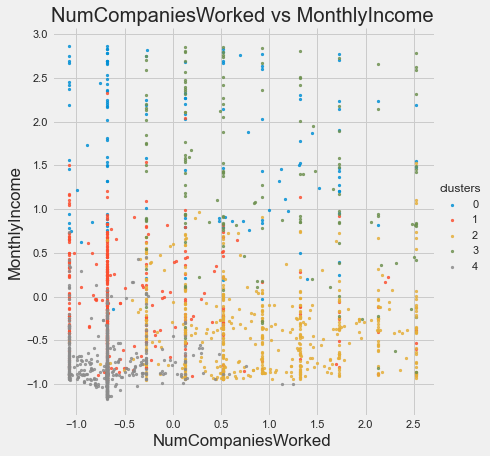

In [63]:
#Scatter plot of PercentSalaryHike and MonthlyIncome 
#plt.style.use("fivethirtyeight")
plt.figure(figsize = (20, 20))

sns.lmplot('NumCompaniesWorked', 'MonthlyIncome', 
           data=X_train_scaled1, 
           fit_reg=False, 
           hue="clusters", 
           size =6, 
           scatter_kws={"marker": "D", 
                        "s": 5})
#fig = plt.figure()


plt.title('NumCompaniesWorked vs MonthlyIncome')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('MonthlyIncome')


In [64]:
print(kmeans.predict(X_test_scaled))

[1 4 4 1 4 4 1 1 1 2 0 4 4 1 3 1 4 4 1 2 4 0 1 2 2 1 1 3 4 2 1 1 3 3 2 1 0
 4 1 2 0 1 0 0 1 4 2 1 4 4 3 4 1 2 4 2 2 3 4 2 1 4 0 4 3 3 2 1 2 4 0 4 1 2
 2 4 2 3 2 1 3 1 4 4 1 4 0 2 2 1 4 1 2 2 1 2 2 2 4 1 2 2 0 3 4 2 1 4 1 4 1
 0 3 1 4 1 1 3 3 1 2 4 1 2 3 0 3 2 2 1 0 2 2 2 3 1 4 1 2 2 3 1 1 1 1 2 0 0
 1 4 4 1 2 0 0 1 0 2 1 1 0 1 2 4 3 2 1 4 2 3 0 1 3 2 0 4 2 0 2 3 2 1 3 3 2
 4 3 1 2 4 4 4 1 4 4 1 1 3 4 1 4 4 4 2 2 1 4 3 1 1 2 4 1 2 1 2 0 4 3 4 2 4
 4 0 4 2 2 2 4 1 0 2 4 2 1 2 2 1 1 3 2 4 0 4 1 2 2 2 1 1 2 1 2 3 2 2 0 2 2
 2 2 2 1 2 2 2 1 4 2 2 4 1 4 3 1 1 1 2 2 4 4 4 4 3 0 4 1 1 0 1 4 1 2 2]


## 4.5) Support Vector Machine.

**A Support Vector Machine (SVM)** is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems and as such, this is what we will focus on in this post.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes. It is based on the characteristics that we provide the machine with. The more features we consider the easier it is to identify and distinguish both.

SVM generates a line that can cleanly separate the two classes. How clean, you may ask. There are many possible ways of drawing a line that separates the two classes, however, in SVM, it is determined by **the margins and the support vectors.**

### 4.5.1) Data preparation 

Data ahs already been imported and splitted. Necessary data preparation has been also done (scaling, dealing with unbalanced data via SMOTE). So here, we are using:
- df2
- X_train_scaled
- X_test_scaled
- Y_train
- Y_test

### 4.5.2) Building the model

In [65]:
from sklearn.svm import SVC
SVC_model = SVC(kernel='rbf', random_state = 1)
#random_state simply sets a seed to the random generator, so that our train-test splits are always deterministic. 
#If we don't set a seed, it is different each time.
SVC_model.fit(X_train_scaled,Y_train)

SVC(random_state=1)

In [66]:
Y_pred = SVC_model.predict(X_test_scaled)

In [67]:
#In order to join actual labels and predicted labels for the feature attrition
Y_test.reset_index(inplace=True, drop=True)

In [68]:
Y_test_pred = pd.DataFrame({'Actual': Y_test, 'Predicted': pd.Series(Y_pred)})

In [69]:
Y_test_pred.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


### 4.5.3) Calculating the accuracy of the predictions

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test_pred["Actual"],Y_test_pred["Predicted"])
accuracy = float(cm.diagonal().sum())/len(Y_test_pred["Actual"])
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8639455782312925


In [71]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.85      0.22      0.35        49

    accuracy                           0.86       294
   macro avg       0.86      0.61      0.64       294
weighted avg       0.86      0.86      0.83       294



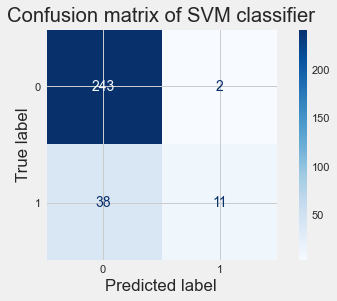

In [72]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(SVC_model, X_test_scaled, Y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix of SVM classifier')
plt.show() 

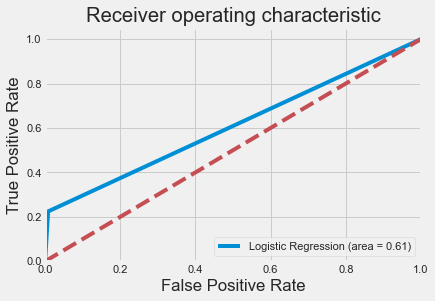

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#plt.style.use("fivethirtyeight")
SVM_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()